In [2]:
import warnings
warnings.filterwarnings('ignore')
import json, os
import numpy as np
from monty.json import MontyDecoder, MontyEncoder
from copy import deepcopy
from scipy.spatial import distance_matrix
import sys
sys.path.append('..')

from phasemapy.dataio import InstanceData
from phasemapy.parser import ICDDEntry
from phasemapy.solver import Phase, Sample,Texture

chemsys = ['Li', 'Sr', 'Al']
oxide_system = True
photon_e = 13e3
max_q_shift = 0.01
resample_density = 1000
initial_alphagamma = 0.1
SUM_NORM = 6000
loss_weight = {'xrd_loss': 6.0, 'comp_loss': 2.0, 'entropy_loss': 0.01}

In [3]:
# 1.Load the instance data and ICDD entries pool in Li-Sr-Al system

#load instance data:50 instances
instance_data = InstanceData.from_json('./data/Instance_data', chemsys, photon_e)
instance_data = instance_data.resample_xrd(resample_density)
instance_data.renormalize(norm=SUM_NORM)
instance_data.normalize()


In [4]:
samples = []
for i in range(instance_data.sample_num):
    solution_file = f'solution/without_TextureAnalysis/samples{i}.json'
    with open(solution_file) as f:
        sample = json.load(f, cls=MontyDecoder)
    if sample.sample_id !=i:
        print (i)    
    samples.append(sample)

In [8]:
texture_groups = {}
# new_samples = []
sample = samples[1]
sample_copy = deepcopy(sample)
po = []
for index, solution in enumerate(sample.solution):
    if solution.entry.structure:
        sample_texture = Texture(sample_copy,TC_cutoff=1.3,fraction_cutoff=0.08,solution=solution,solution_index=index)
        if sample_texture.preferred_orientation:
            print(sample_texture.entry.name)
            print(sample_texture.preferred_orientation)
            formula = sample_texture.entry.chemical_formula
            hkl = sample_texture.preferred_orientation
            if all(isinstance(sublist, list) for sublist in hkl):
                for i in range(len(hkl)):
                    if f'{formula}_{hkl[i]}' in texture_groups.keys():
                        texture_group_one = texture_groups[f'{formula}_{hkl[i]}']
                    else:
                        texture_group_one = sample_texture.get_texture_group(preferred_orientation=hkl[i])
                        texture_groups[f'{formula}_{hkl[i]}'] = texture_group_one
                          
            else:
                if f'{formula}_{hkl}' in texture_groups.keys():
                    texture_group_one = texture_groups[f'{formula}_{hkl}'] 
                else:
                    texture_group_one = sample_texture.get_texture_group(preferred_orientation=hkl)
                    texture_groups[f'{formula}_{hkl}'] = texture_group_one

SrO
[2, 0, 0]
Li2O
[1, 1, 1]


In [5]:

texture_groups = {}
new_samples = []
for i,sample in enumerate(samples):
    iter_num = 1
    print(i)
    sample_texture = Texture(sample,TC_cutoff=1.2)
    while  iter_num <= len(sample.solution):
        if len(sample_texture.preferred_orientation ) != 0:
            print(sample_texture.entry.name)
            print(sample_texture.preferred_orientation)
            if sample_texture.entry.chemical_formula in texture_groups.keys():
                texture_group_one = texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}']
            else:
                texture_group_one = sample_texture.get_texture_group()
                texture_groups[f'{sample_texture.entry.chemical_formula}_{sample_texture.preferred_orientation}'] = texture_group_one
            sample_dup = sample_texture.optimize_by_texture(texture_group_one)    
        first_solution = sample_dup.solution.pop(0)
        sample_dup.solution.append(first_solution)
        sample_texture = Texture(sample_dup,TC_cutoff=1.2)
        iter_num = iter_num + 1
        
    new_samples.append(sample_texture.sample)

0


TypeError: __init__() missing 3 required positional arguments: 'fraction_cutoff', 'solution', and 'solution_index'

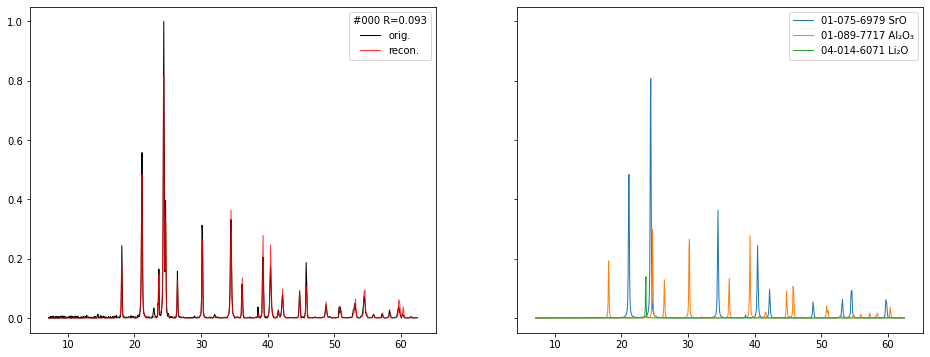

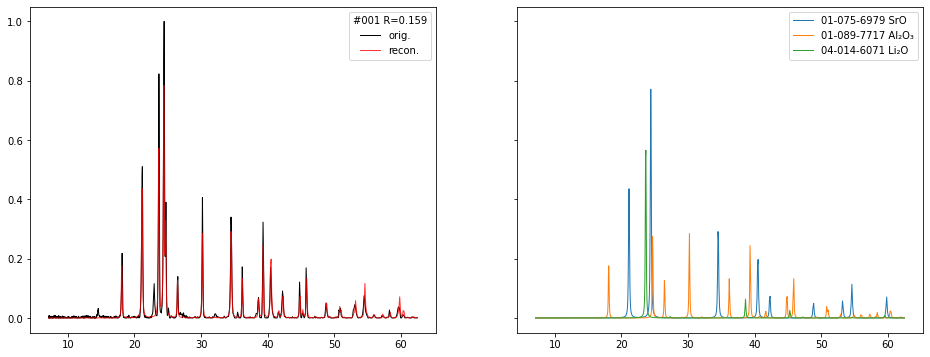

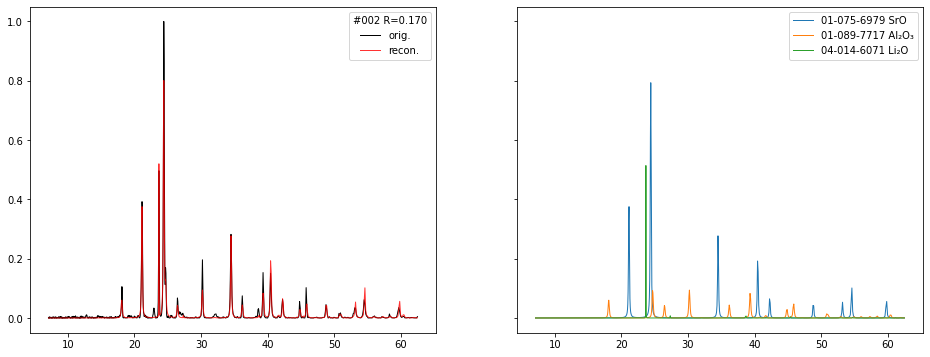

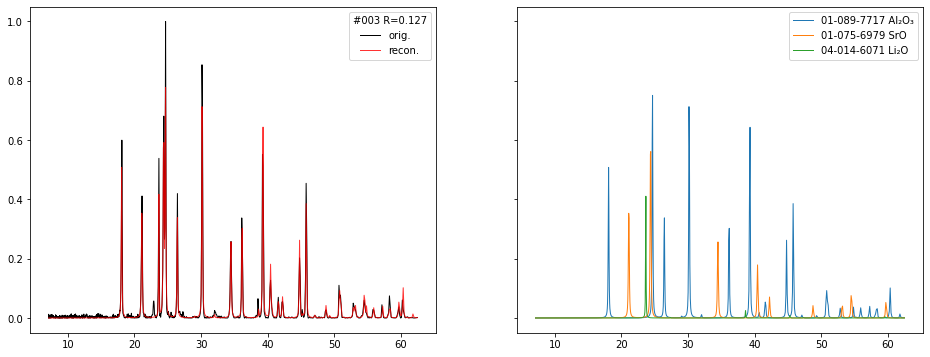

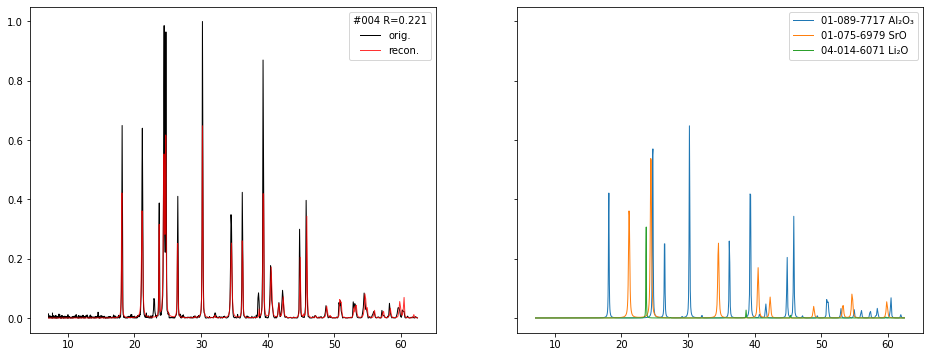

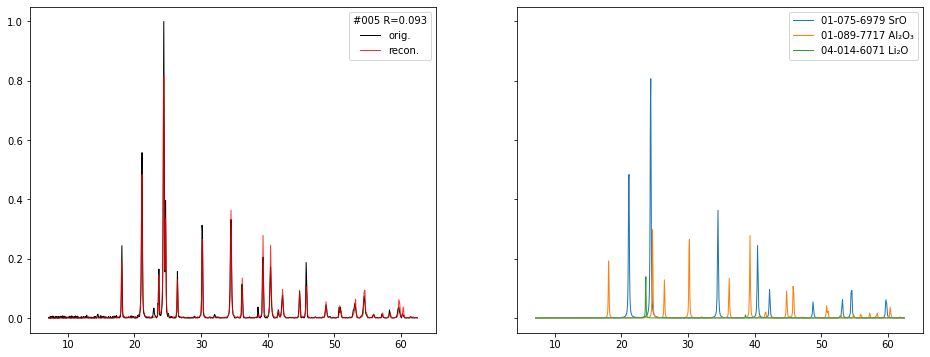

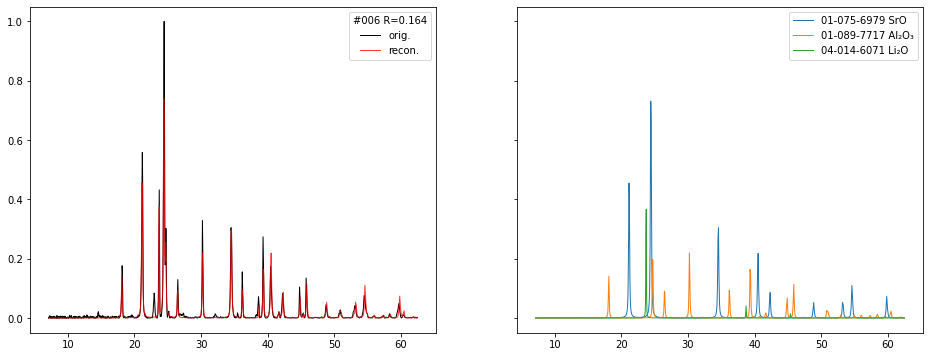

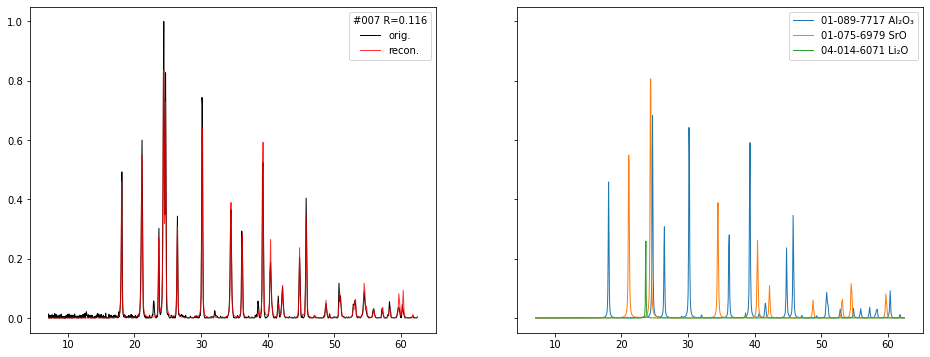

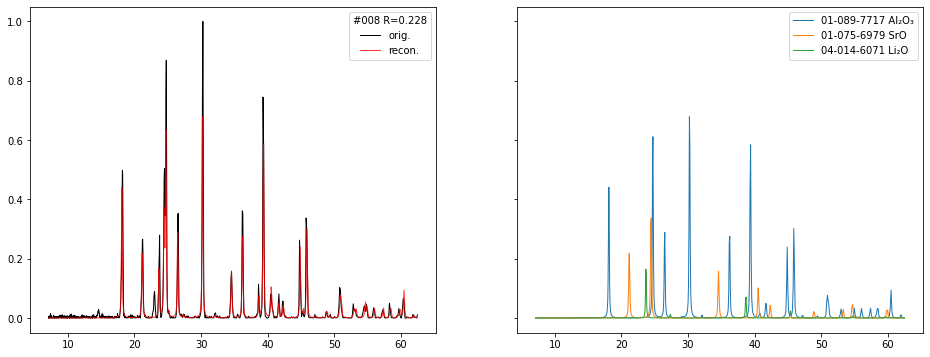

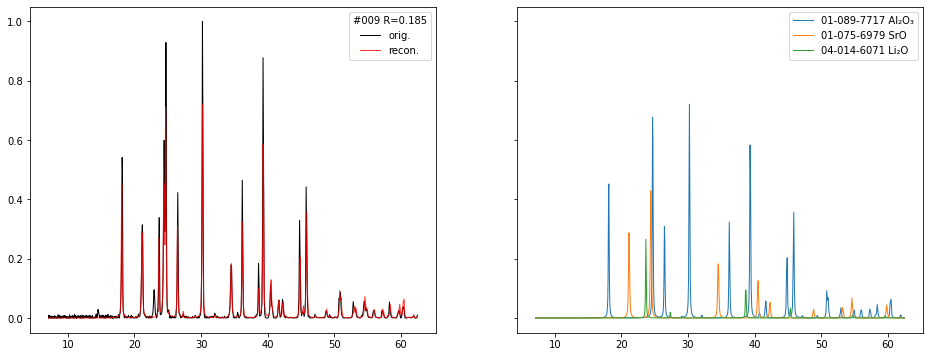

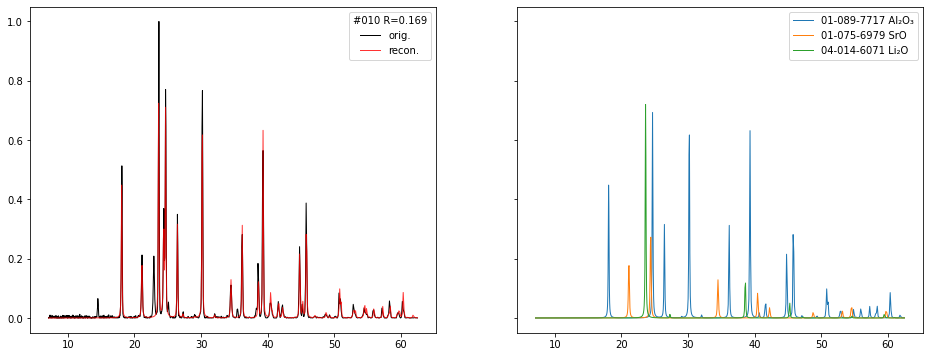

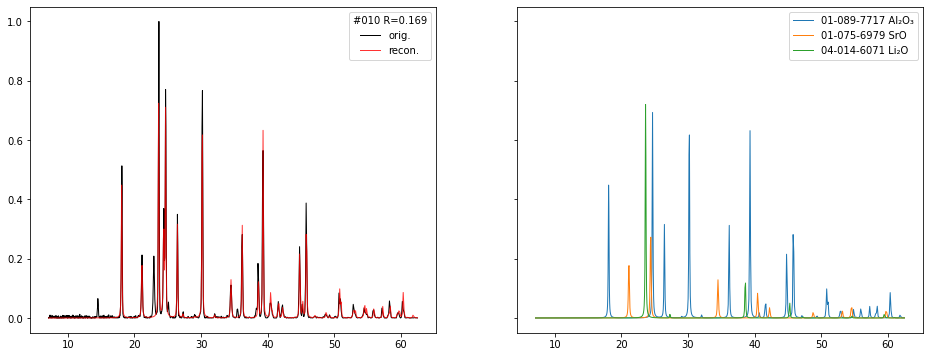

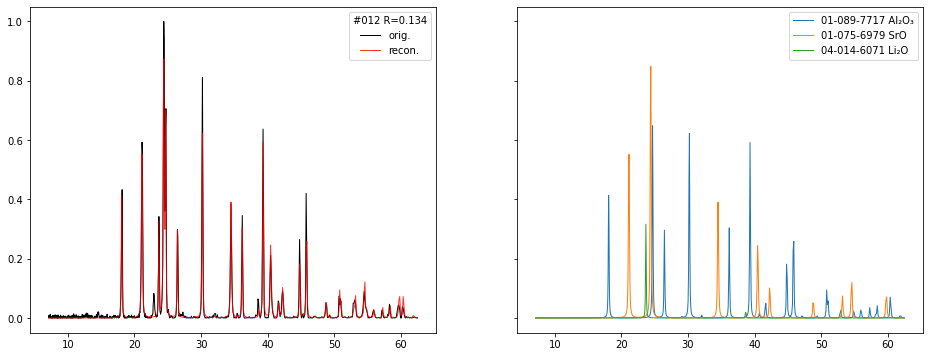

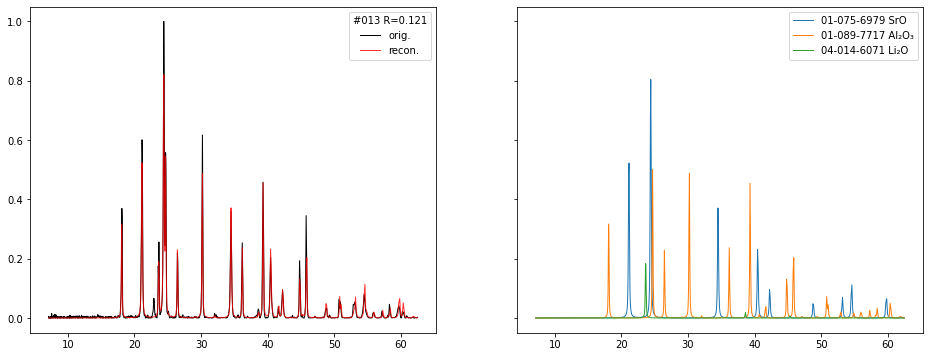

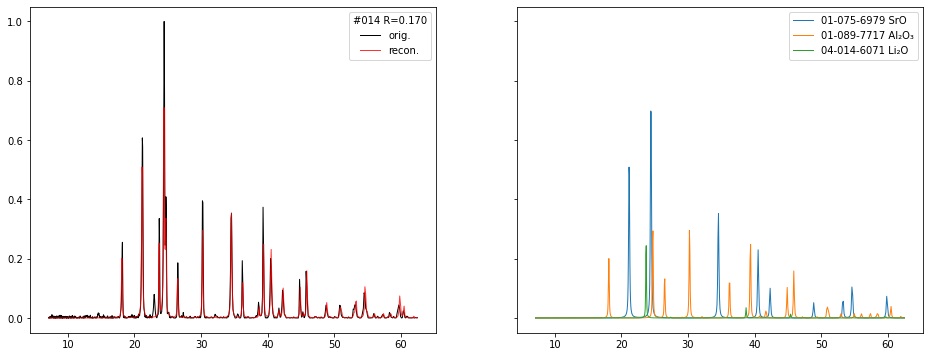

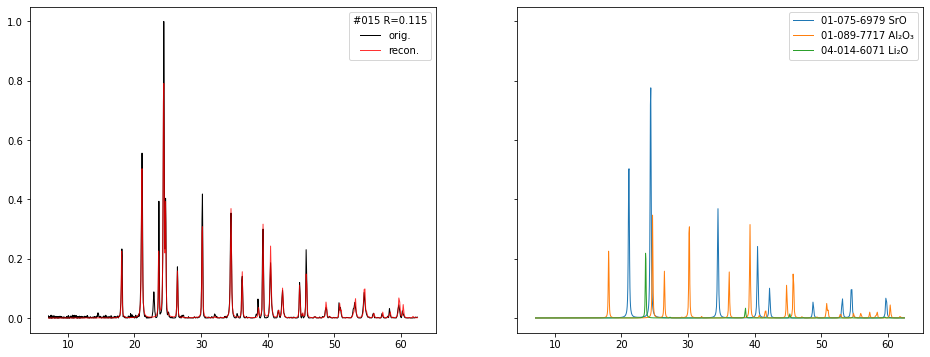

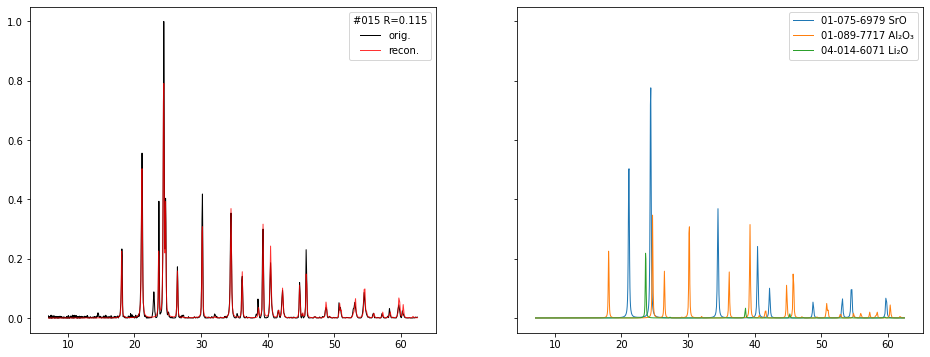

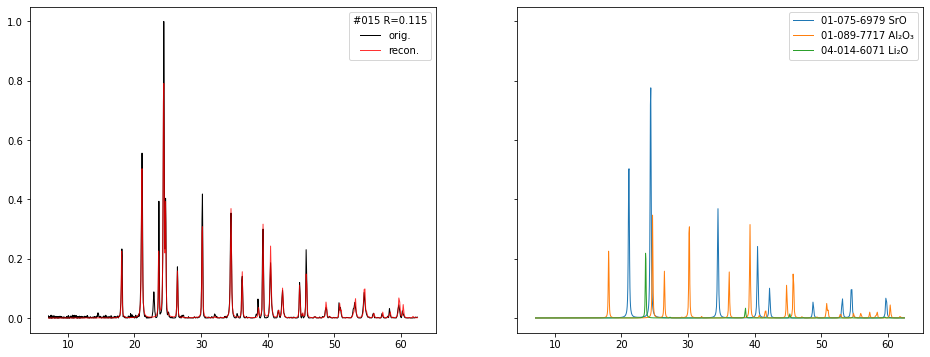

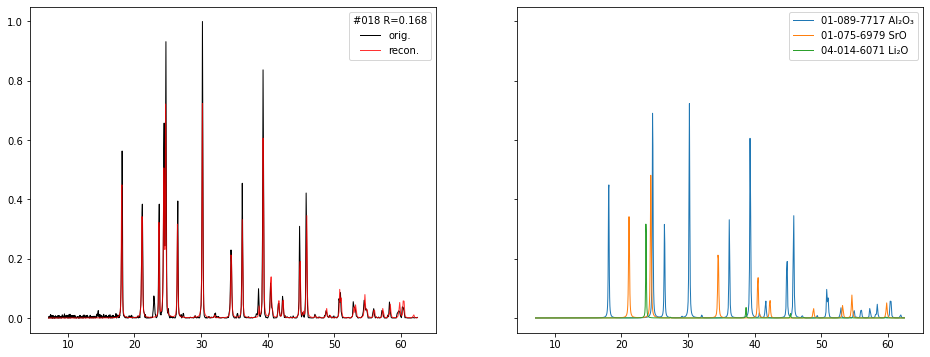

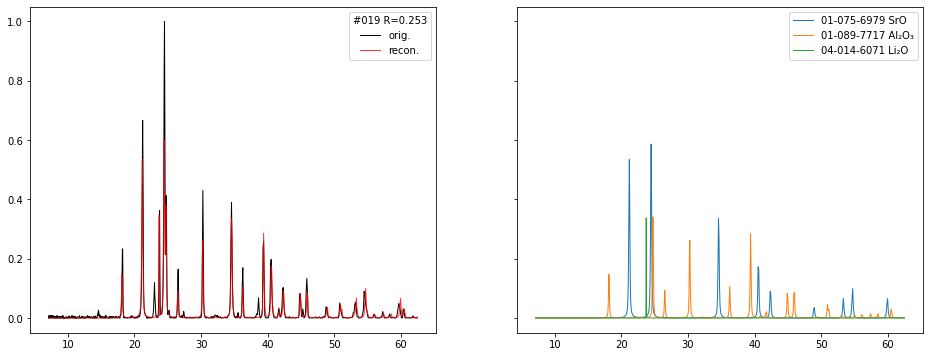

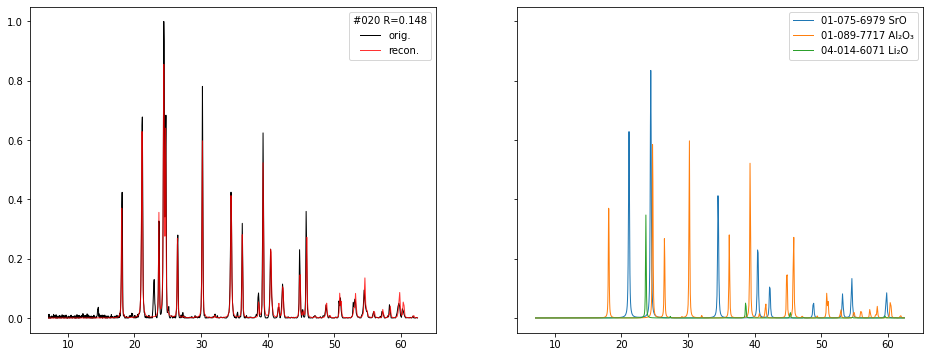

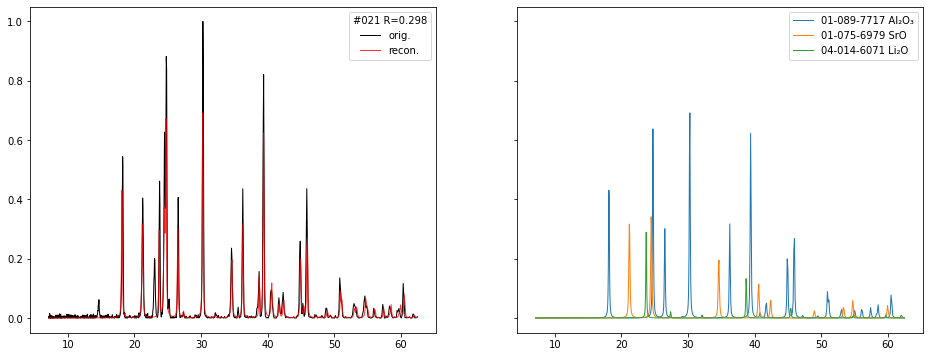

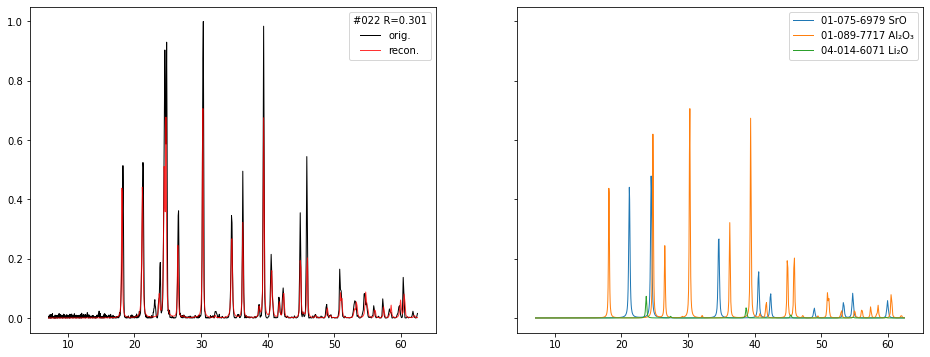

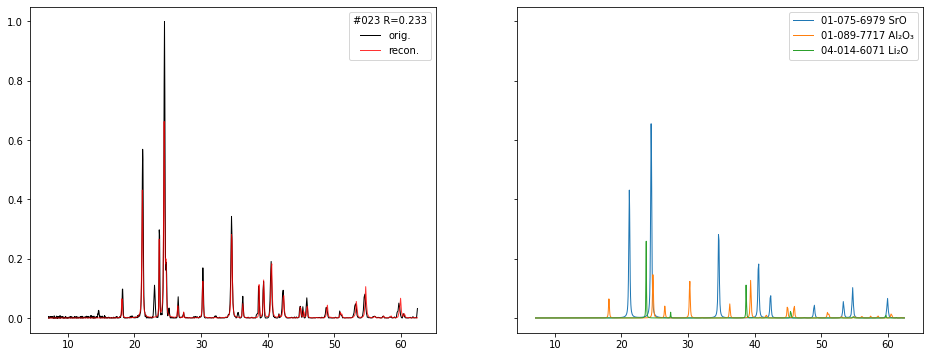

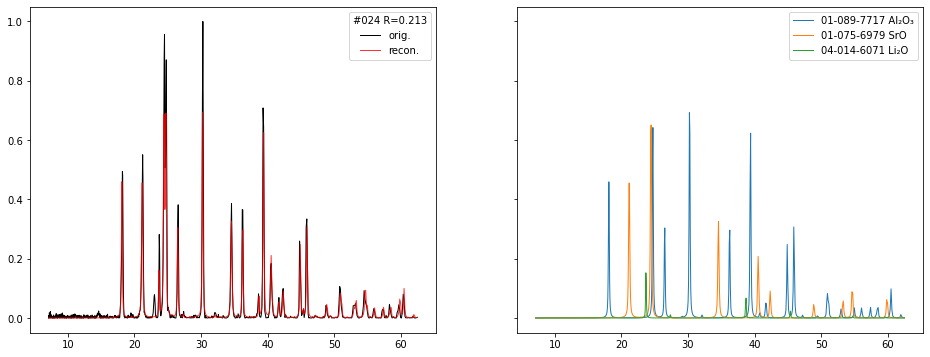

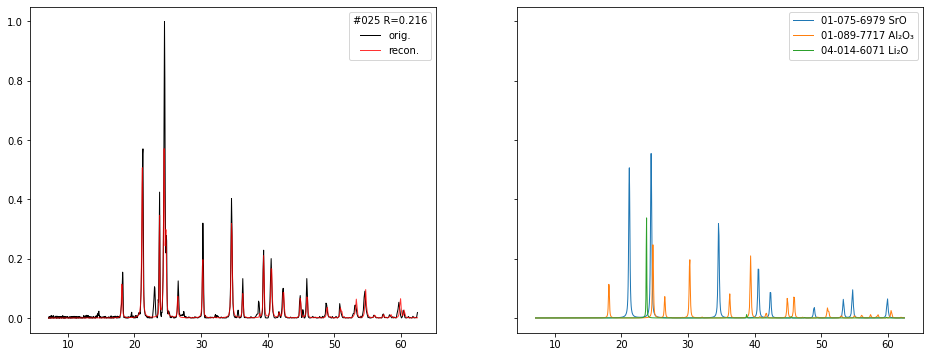

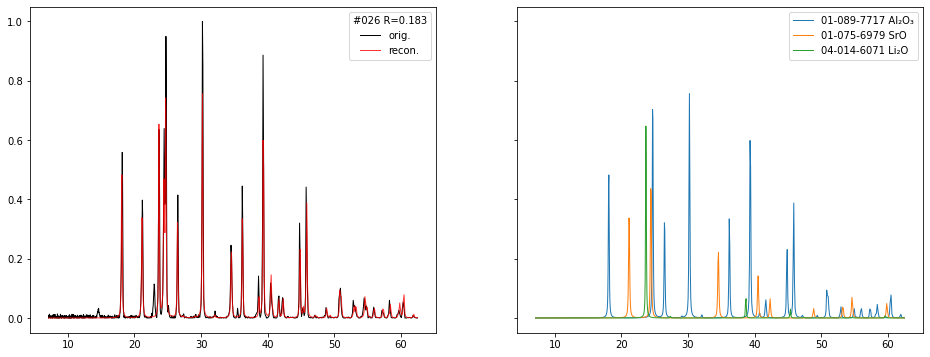

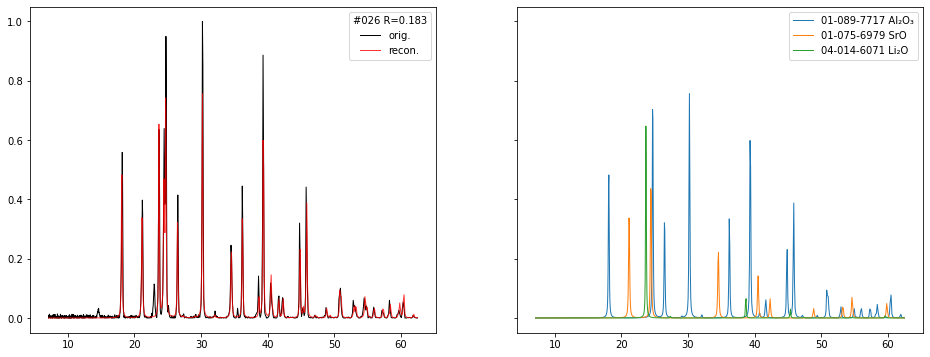

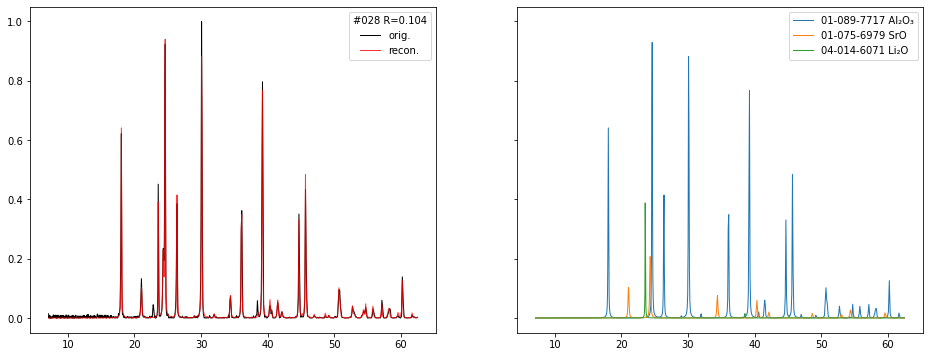

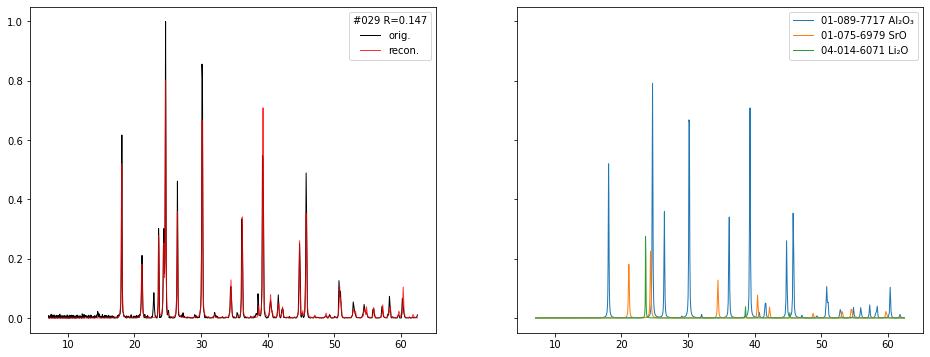

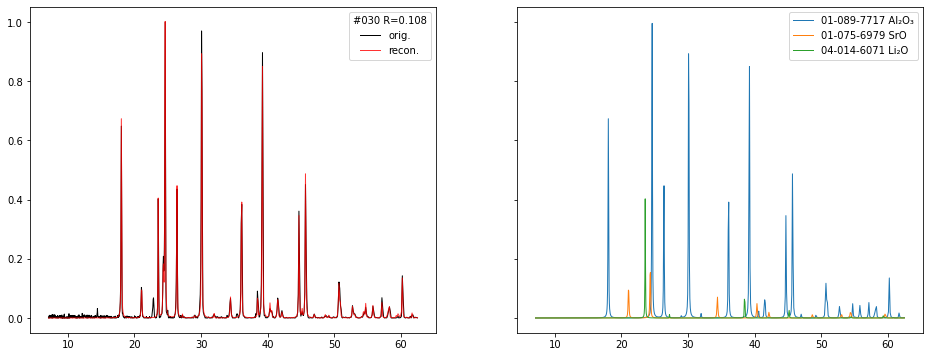

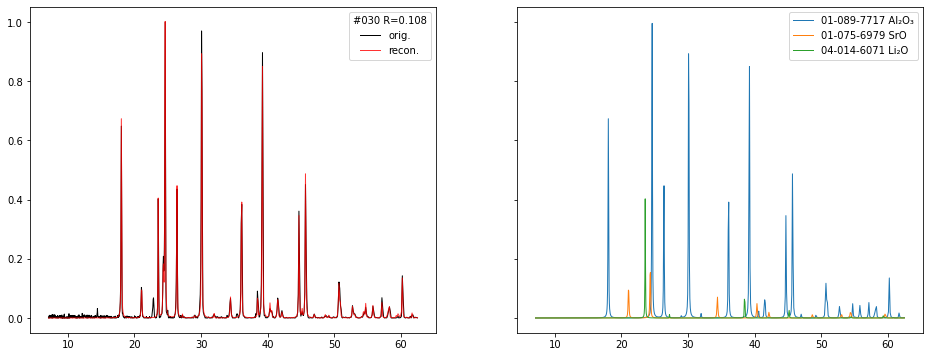

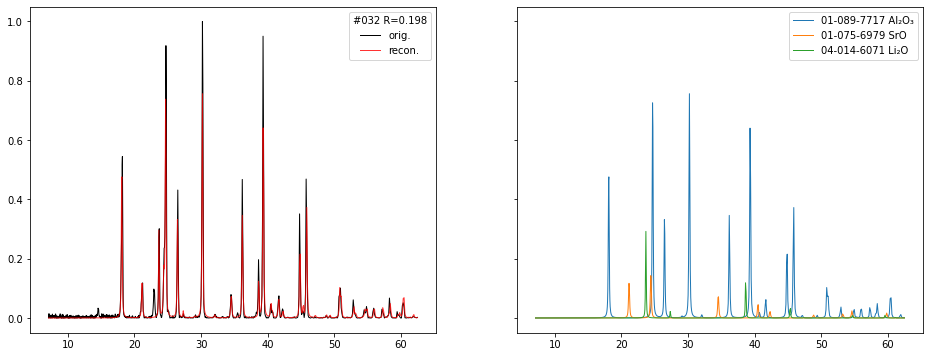

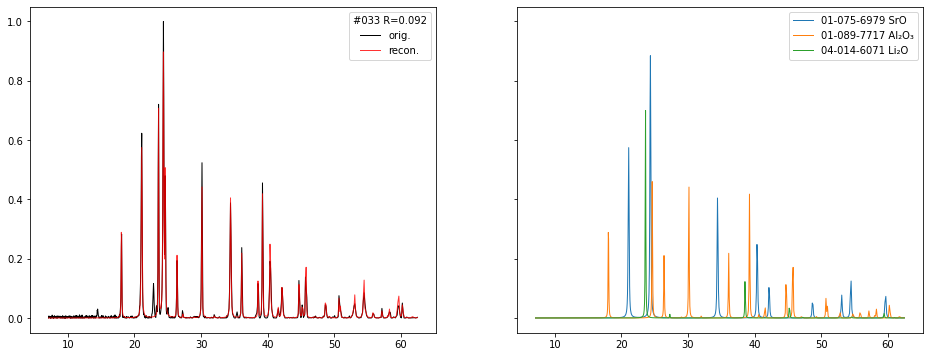

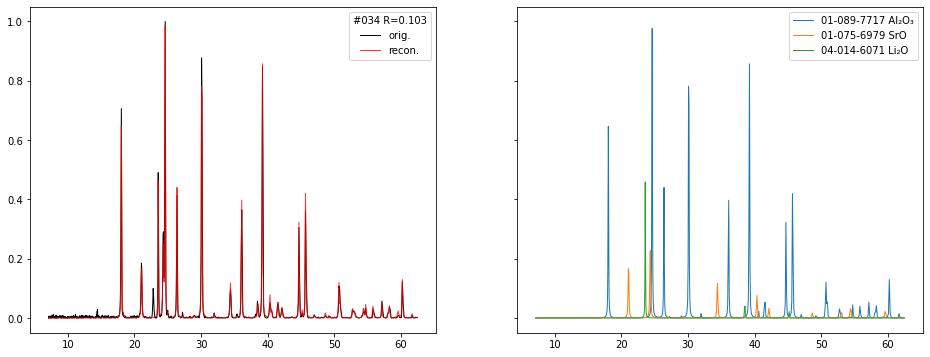

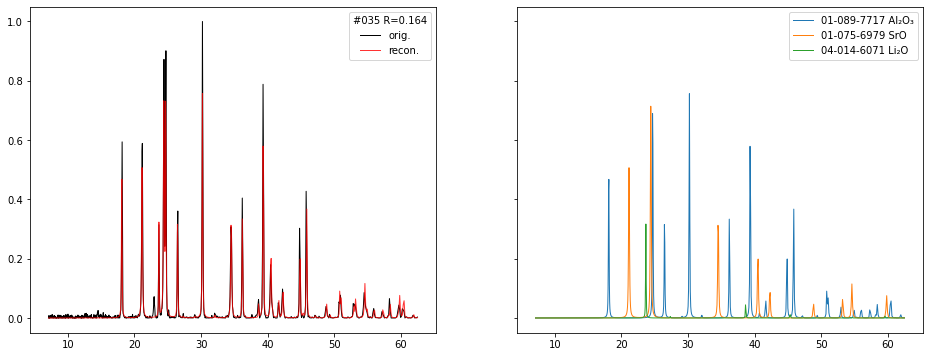

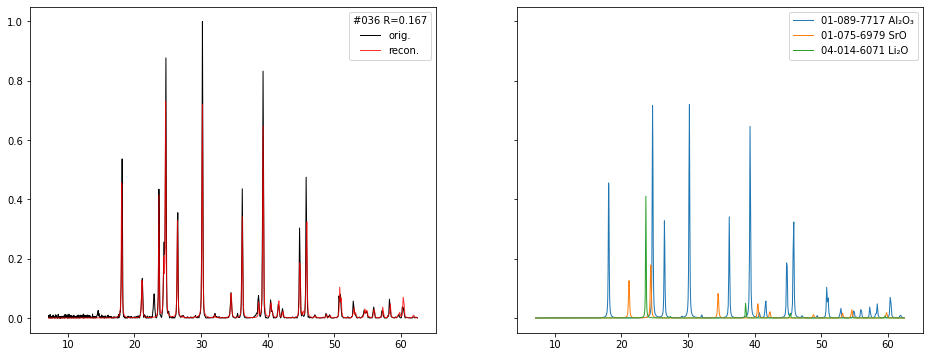

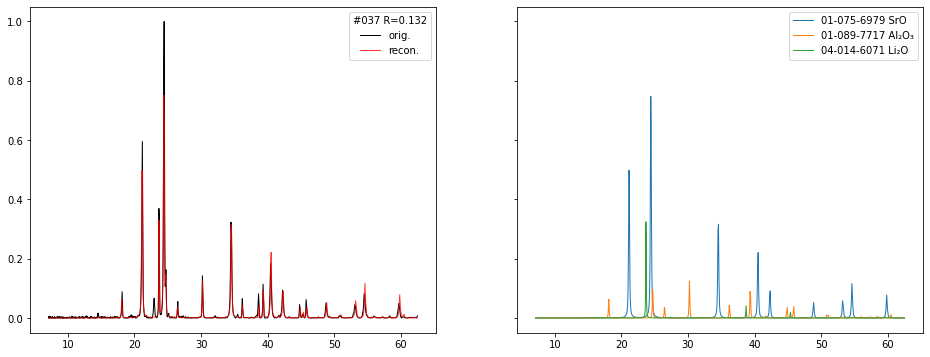

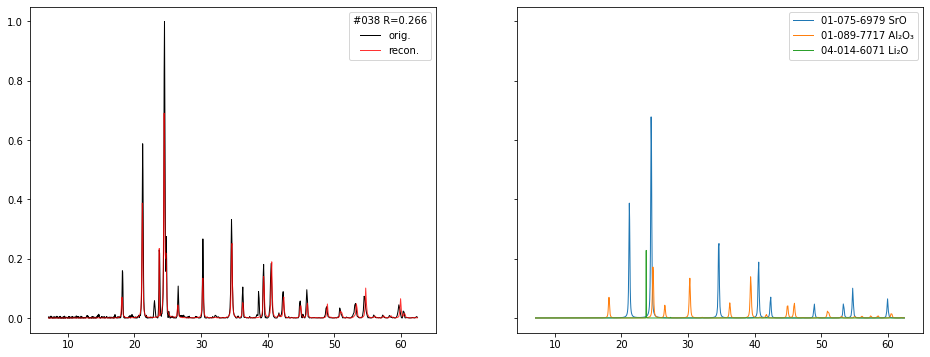

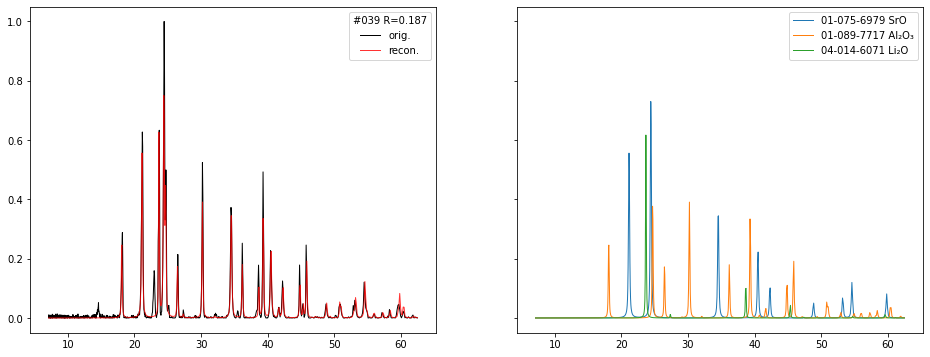

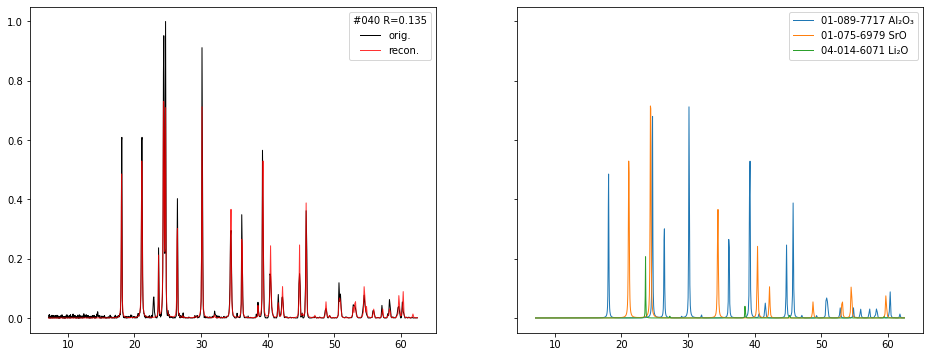

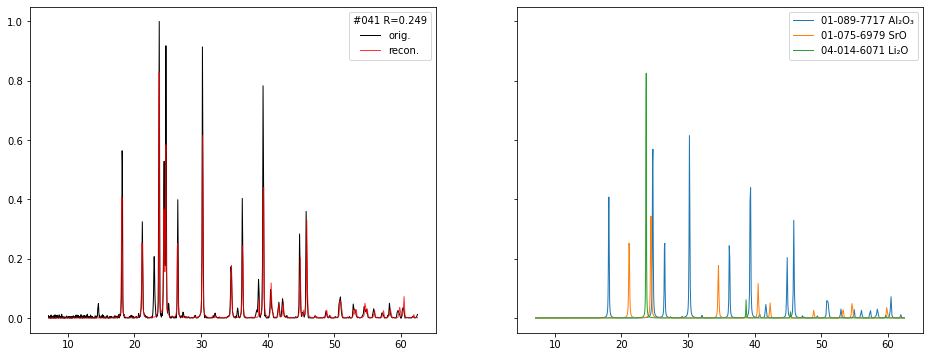

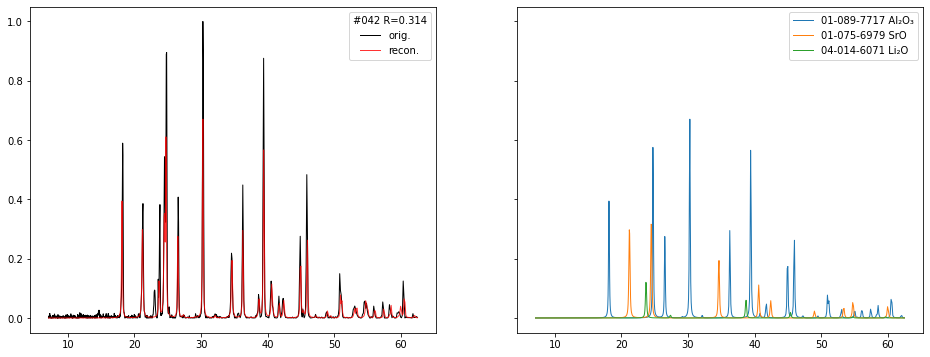

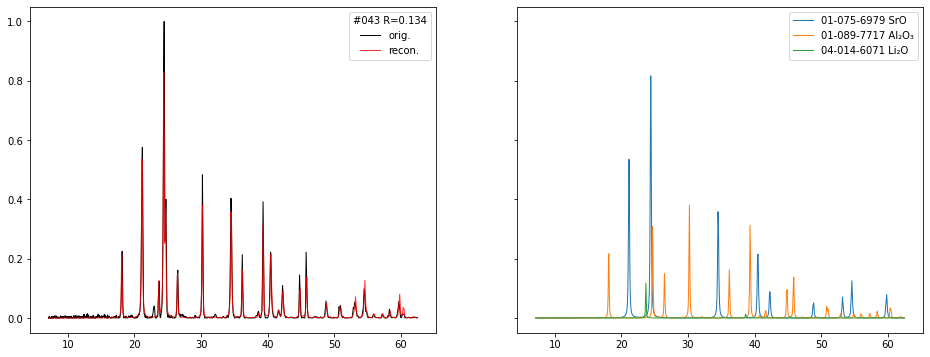

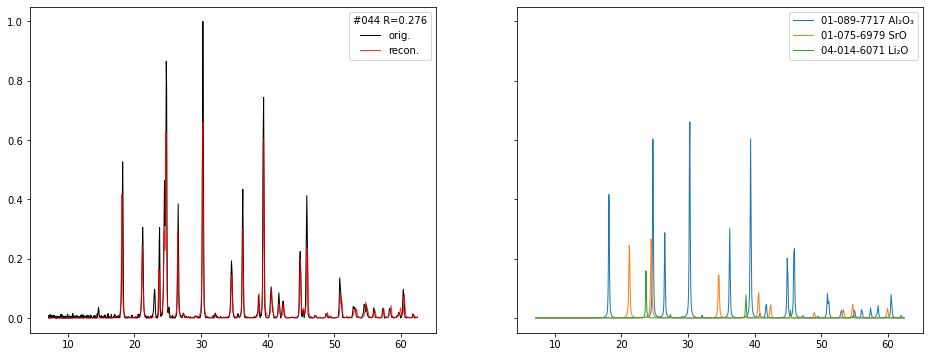

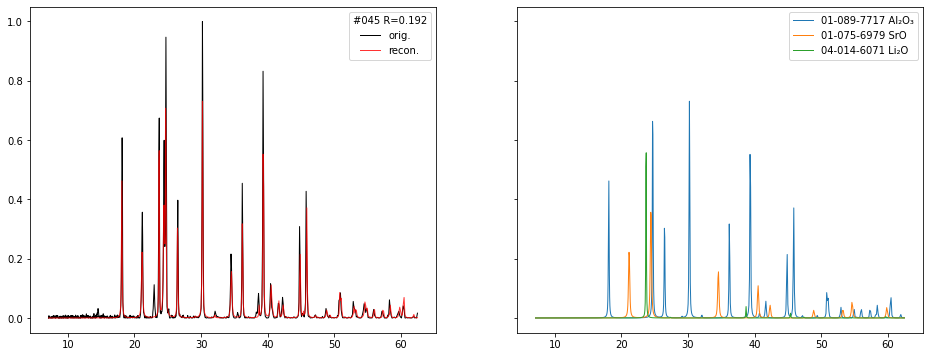

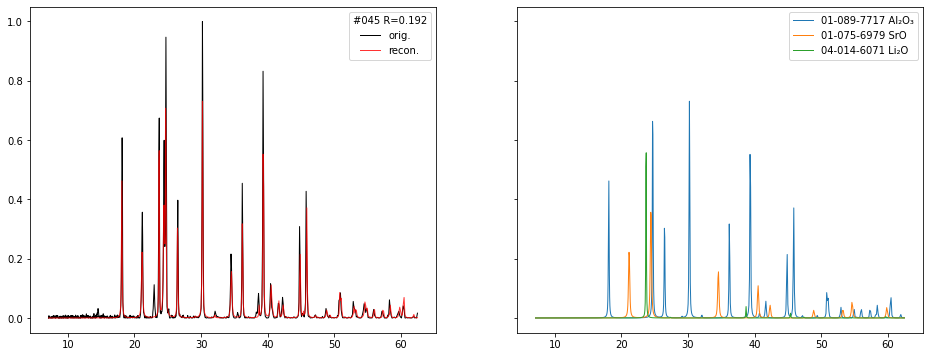

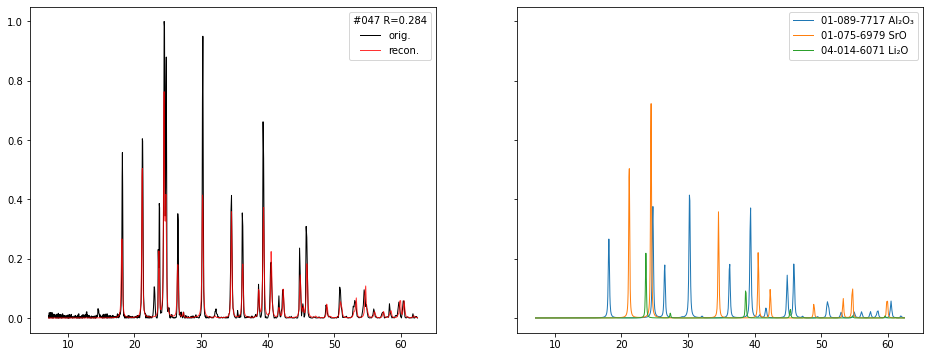

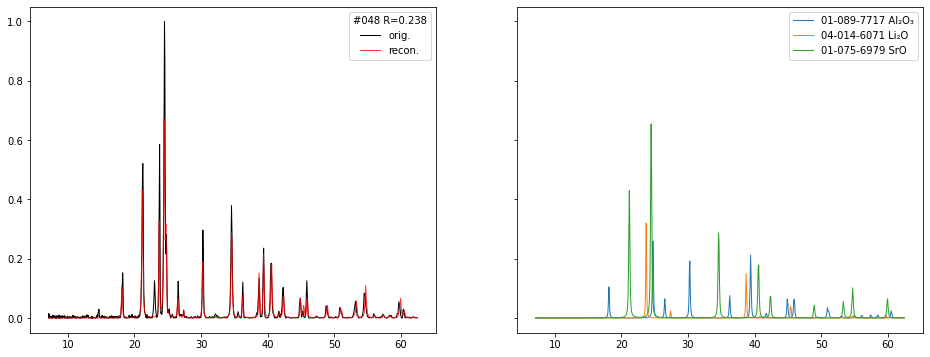

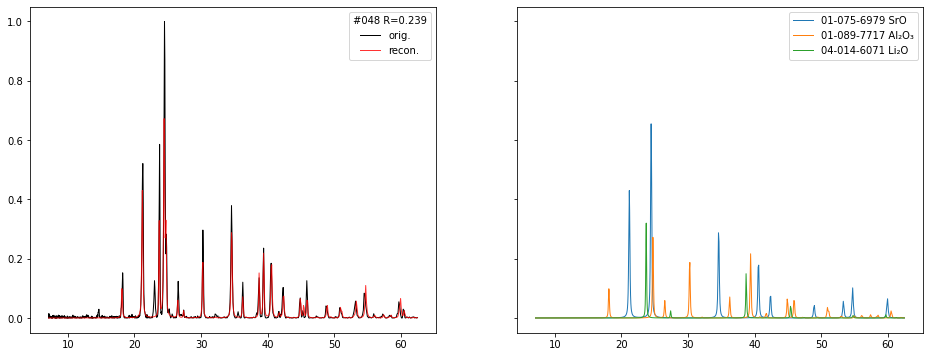

In [9]:
samples = []
for sample in new_samples:
    samples.append(sample)
    sample.plot(perphase=True)

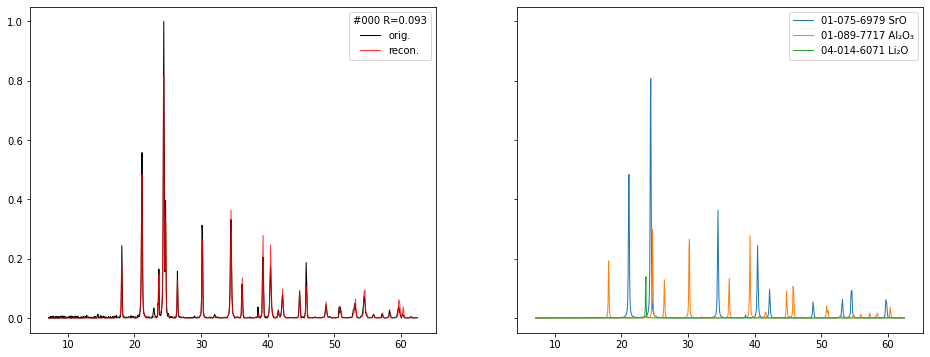

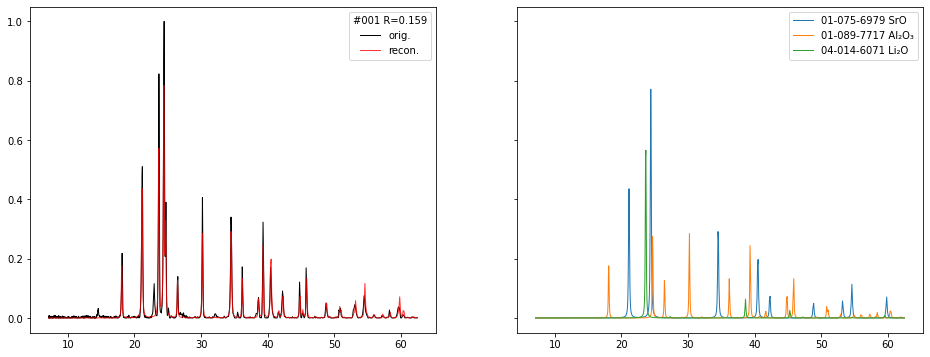

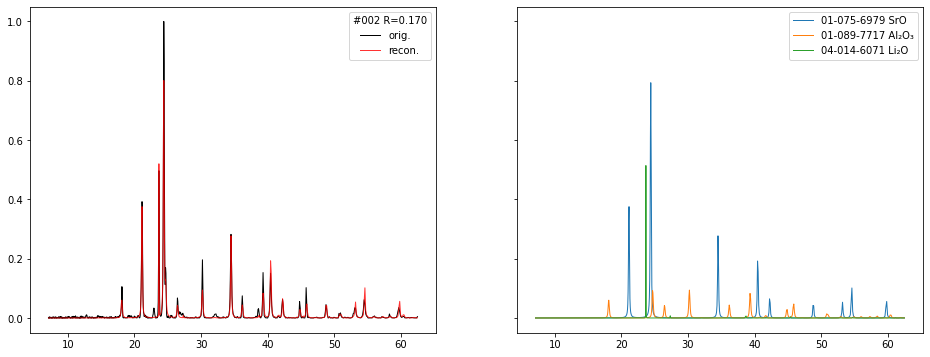

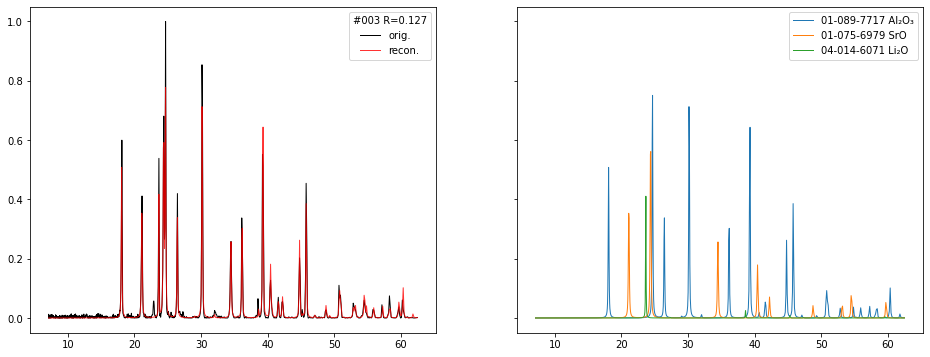

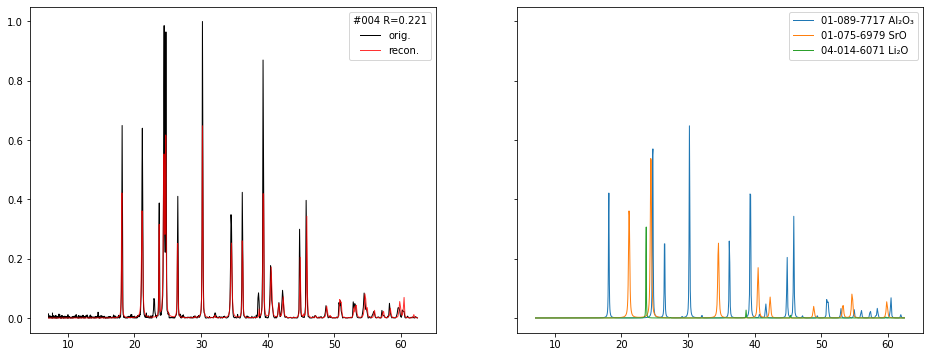

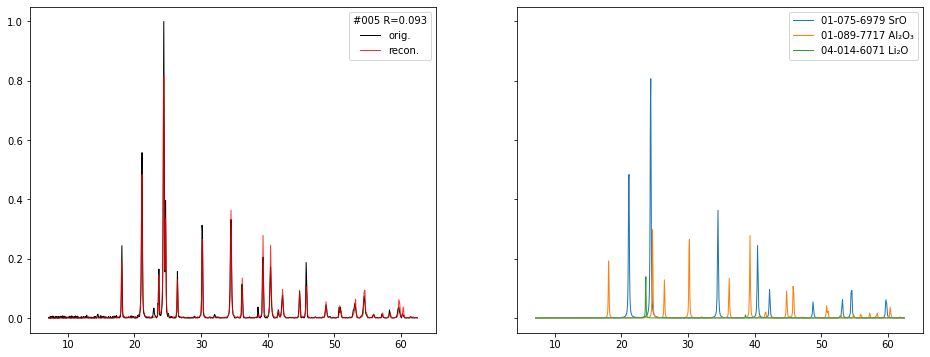

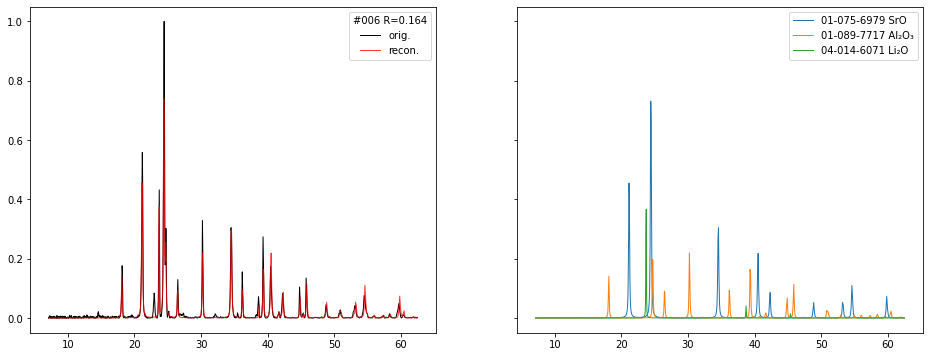

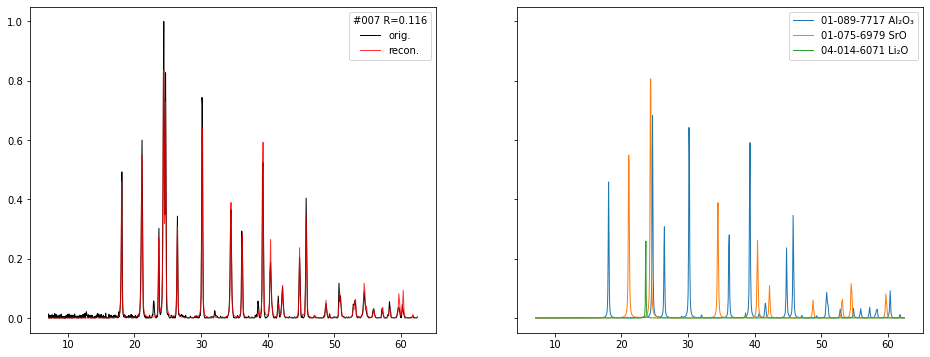

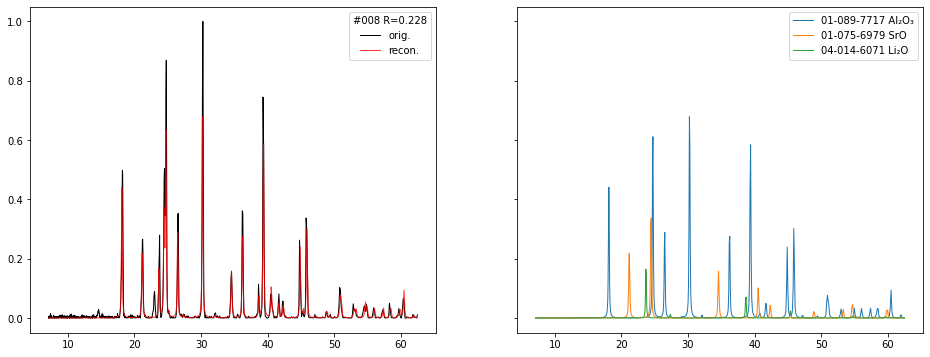

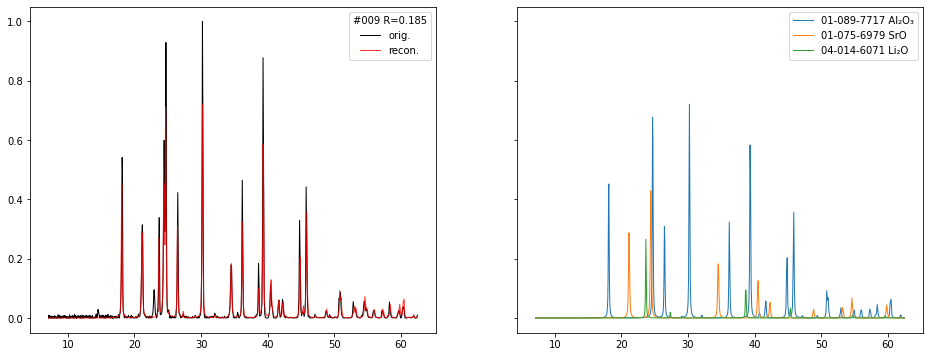

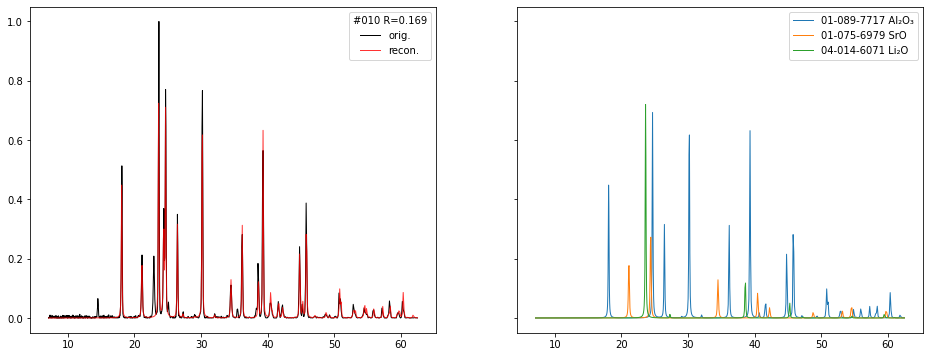

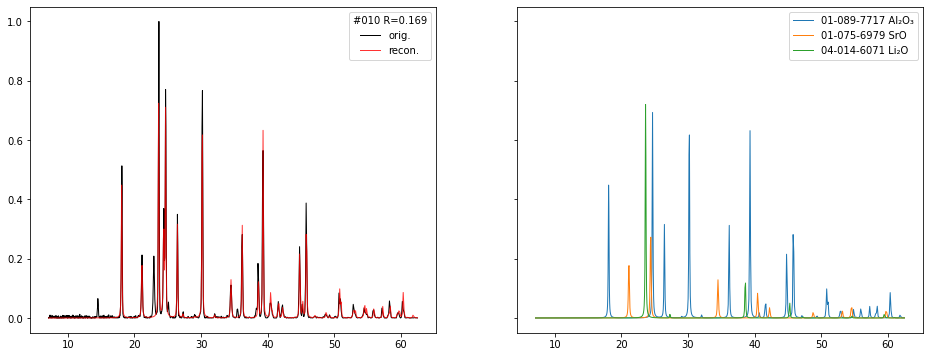

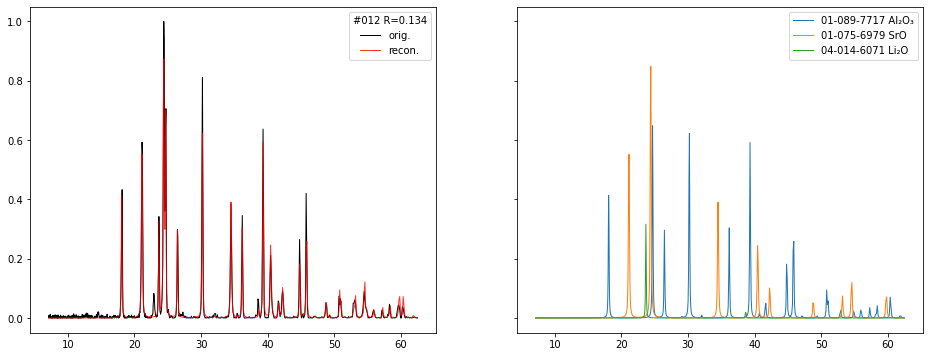

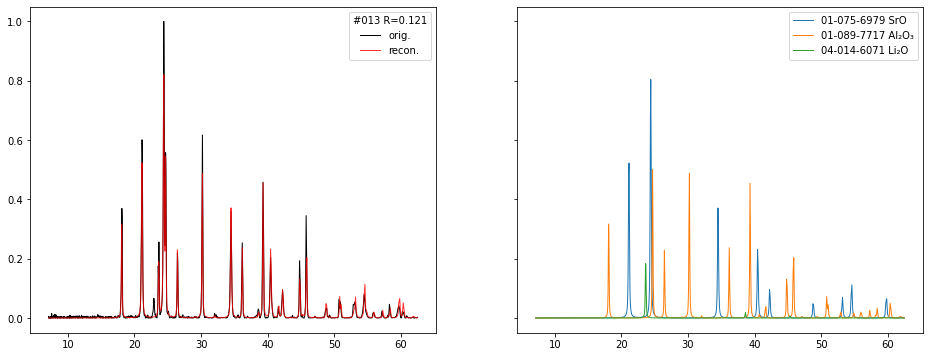

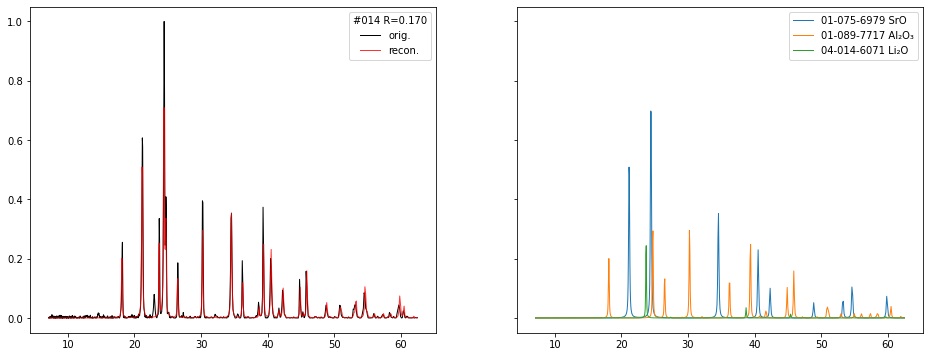

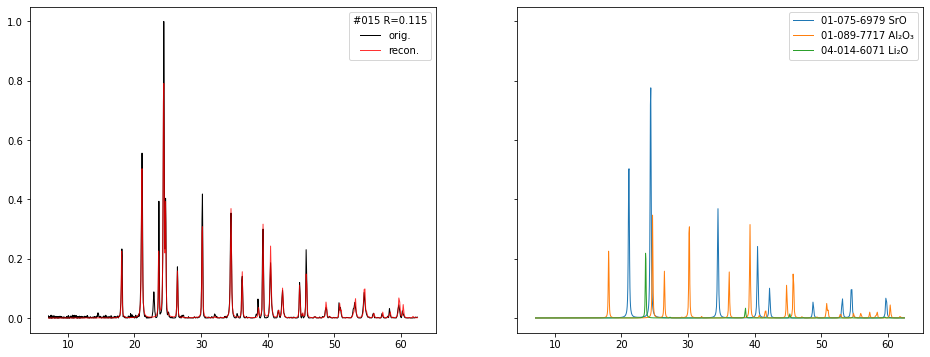

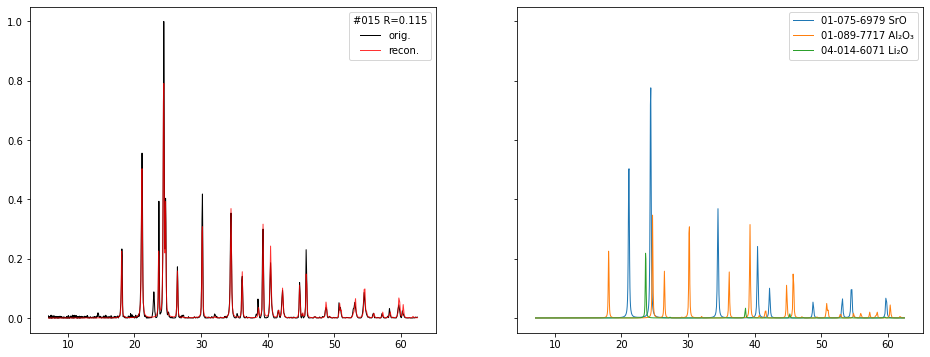

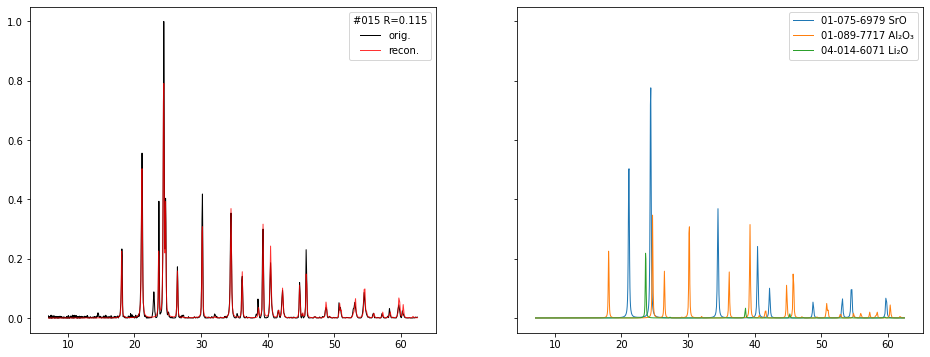

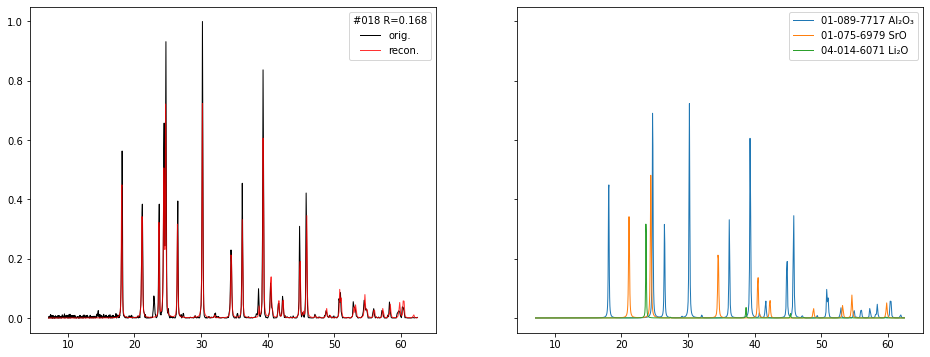

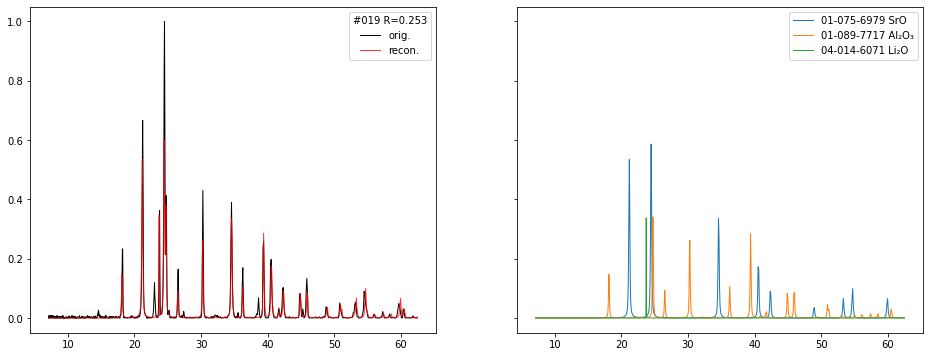

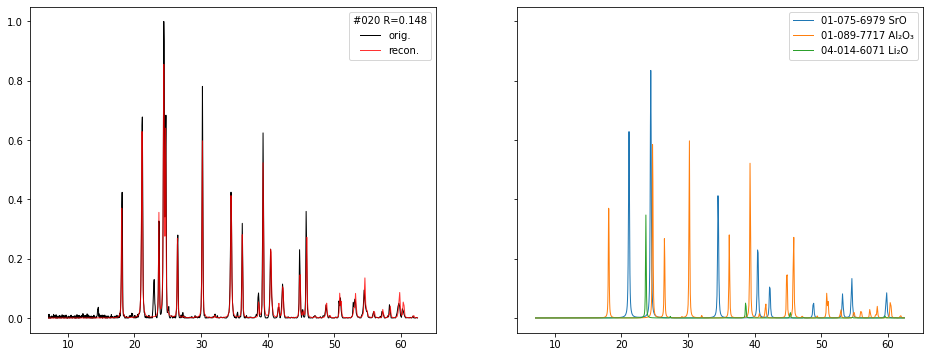

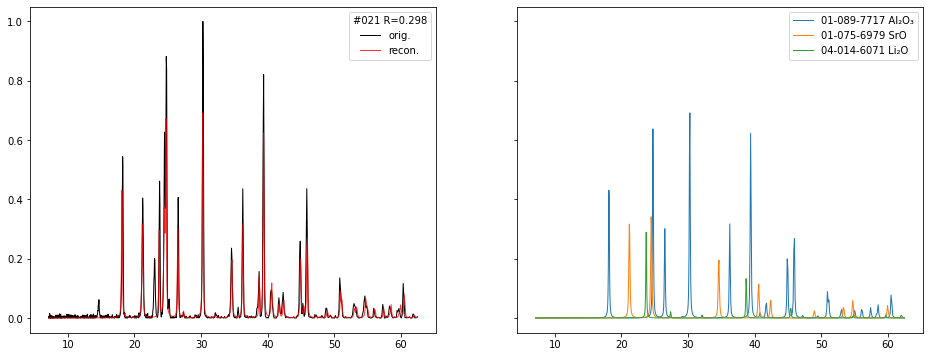

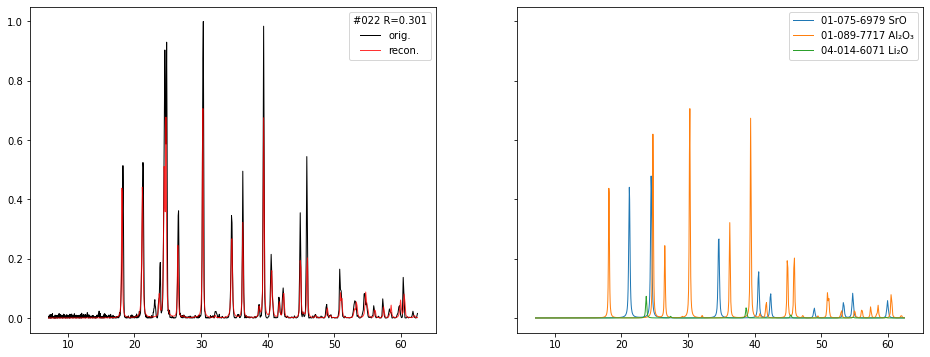

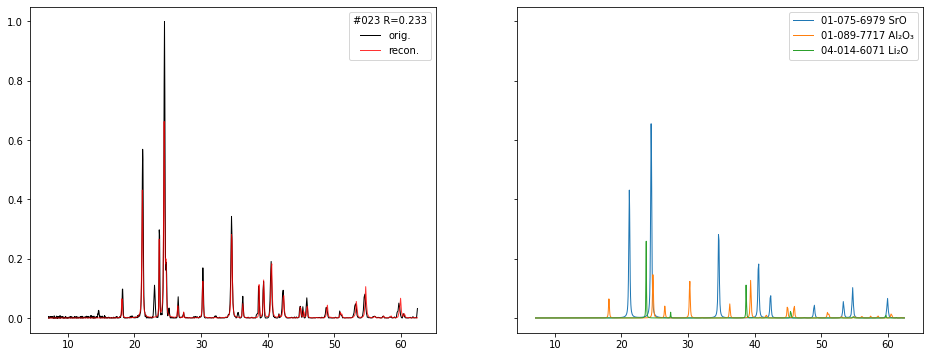

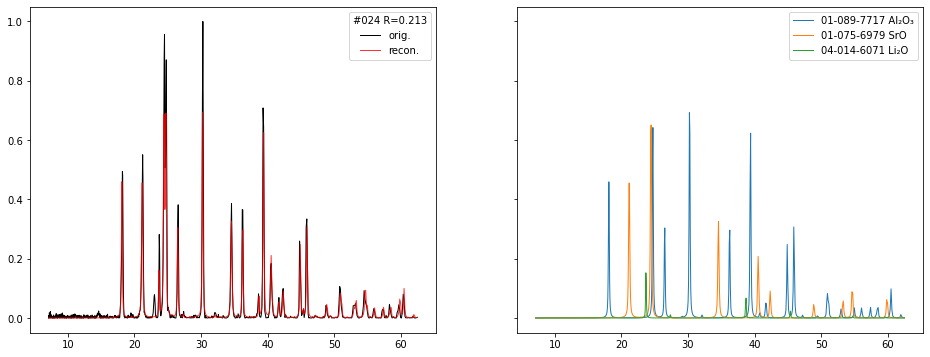

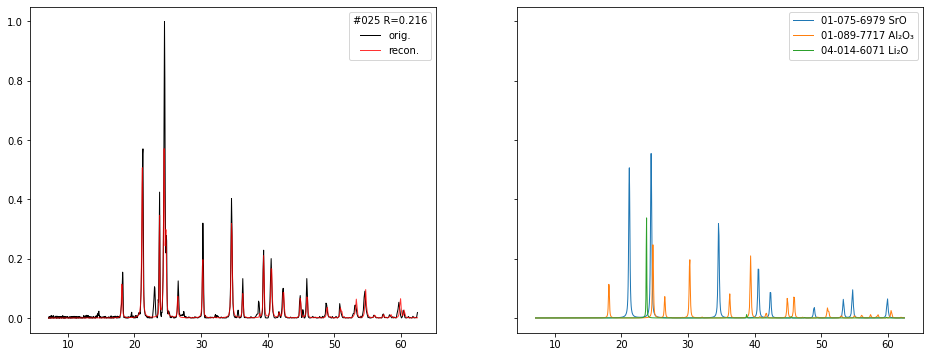

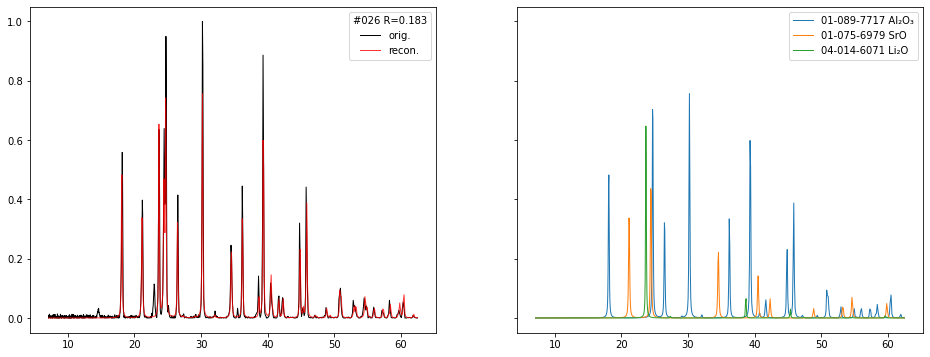

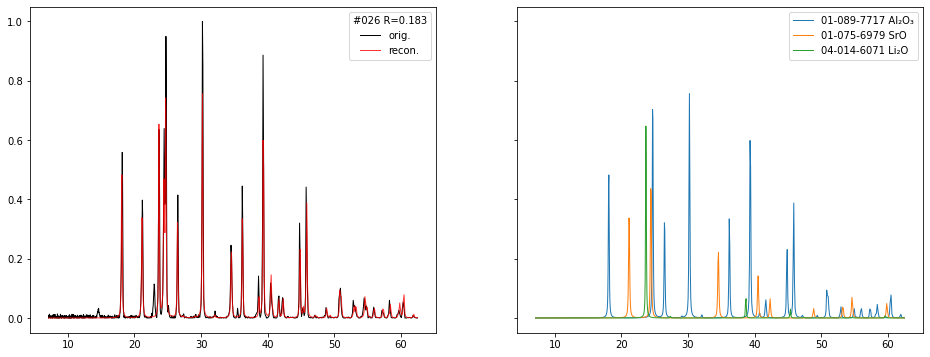

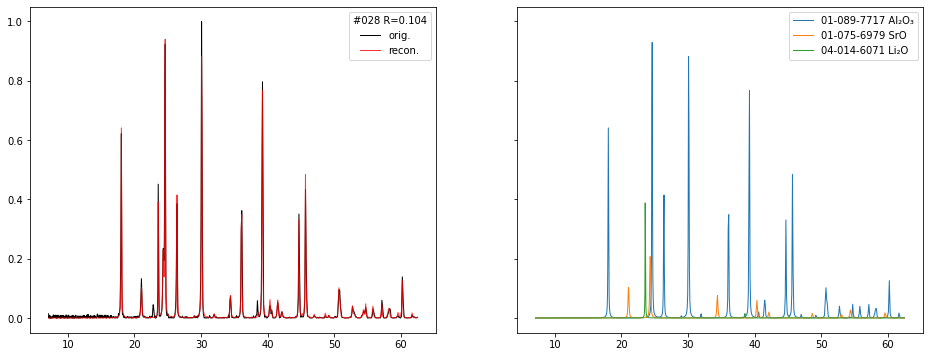

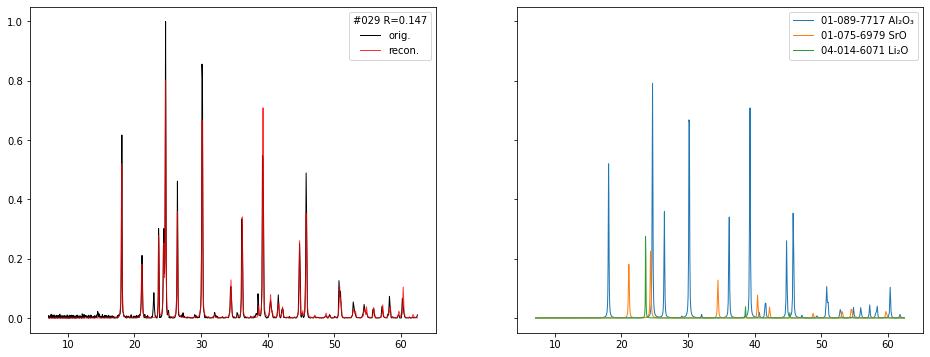

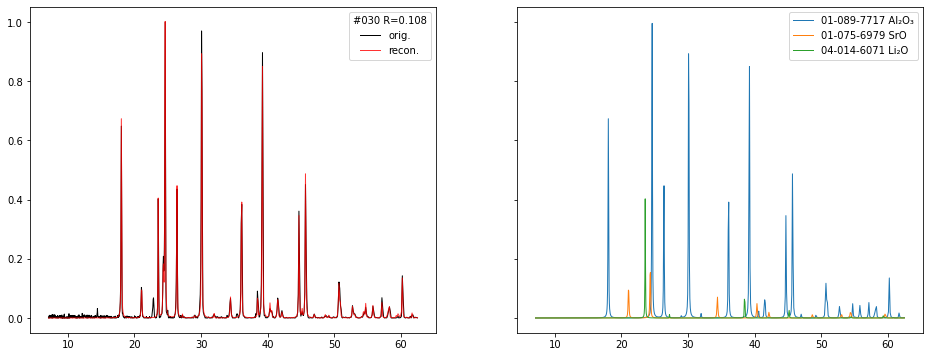

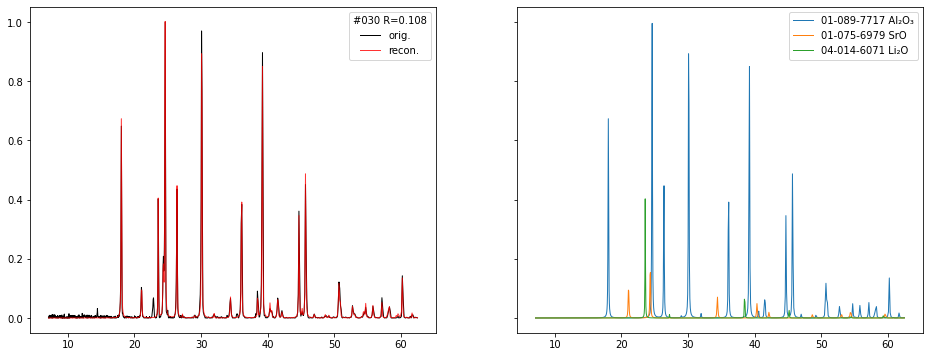

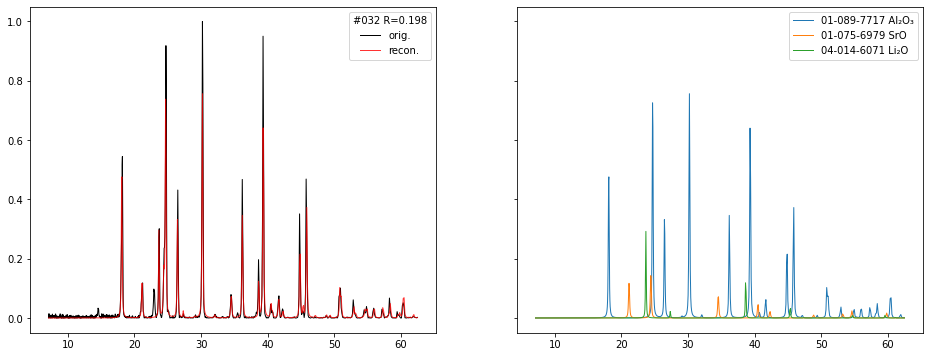

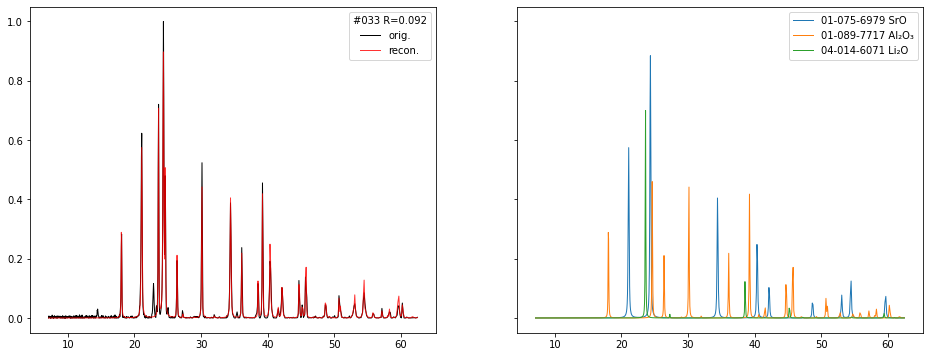

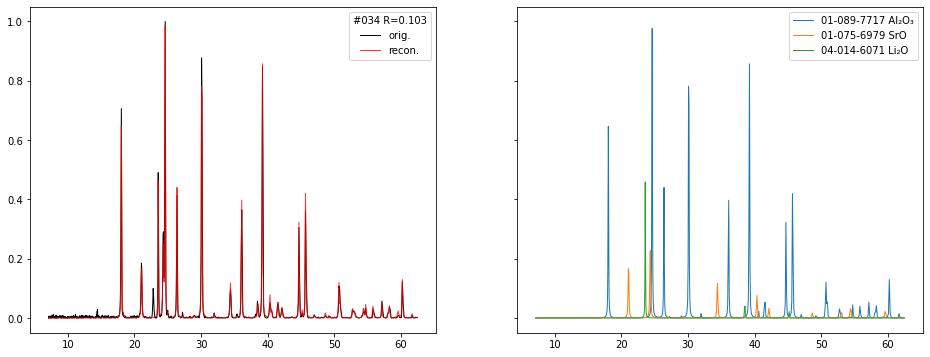

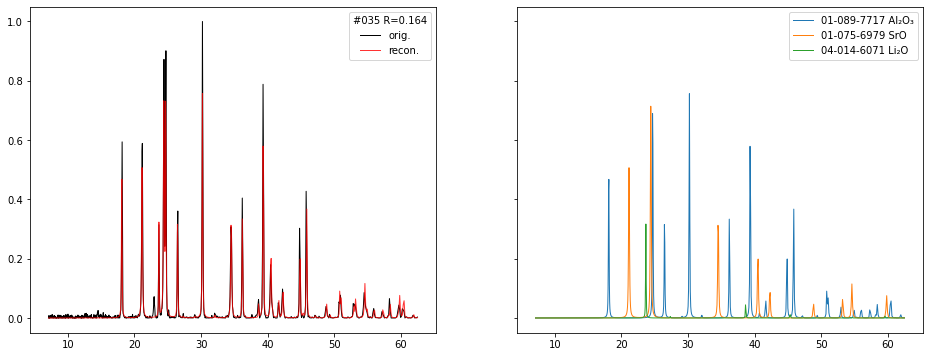

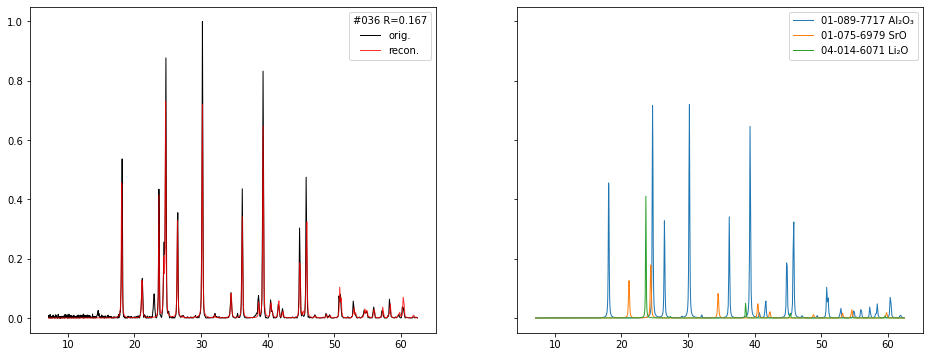

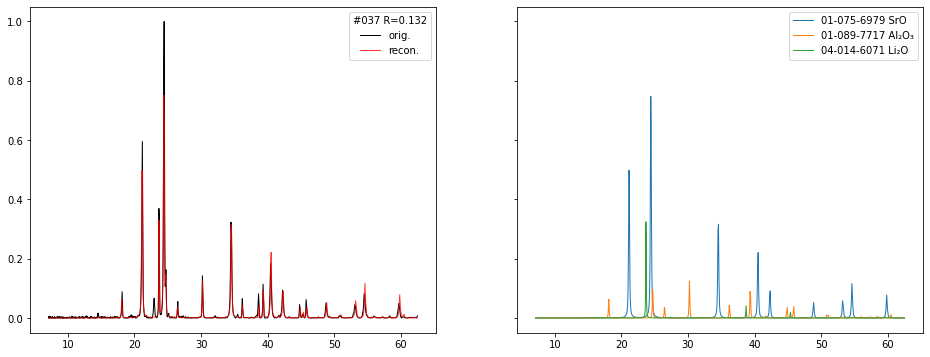

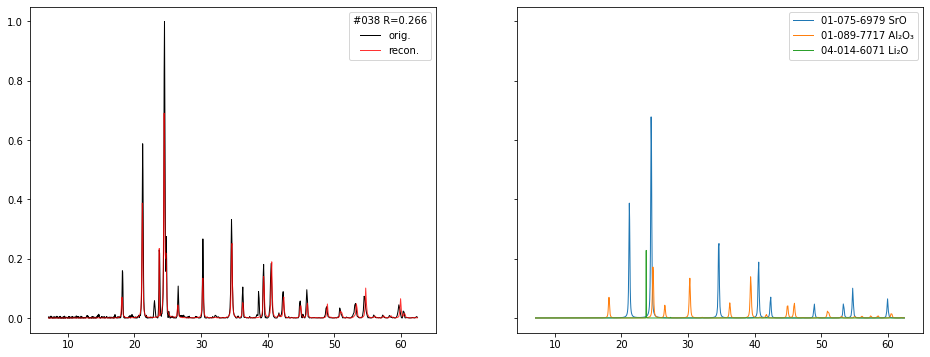

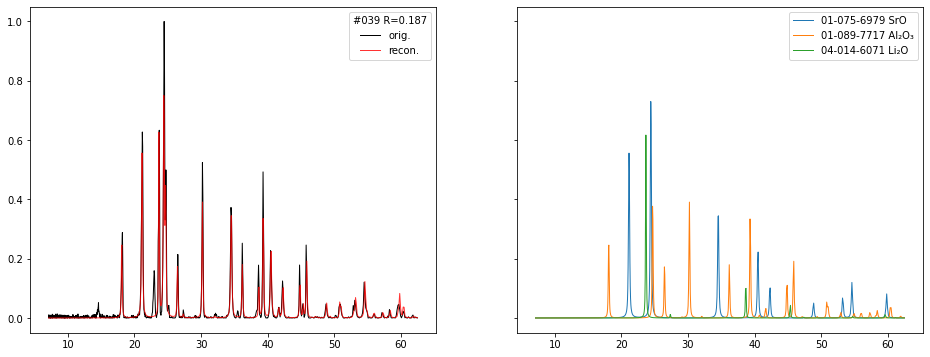

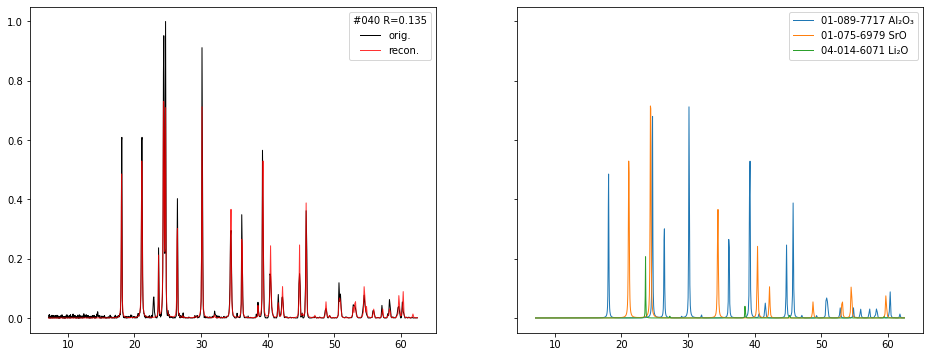

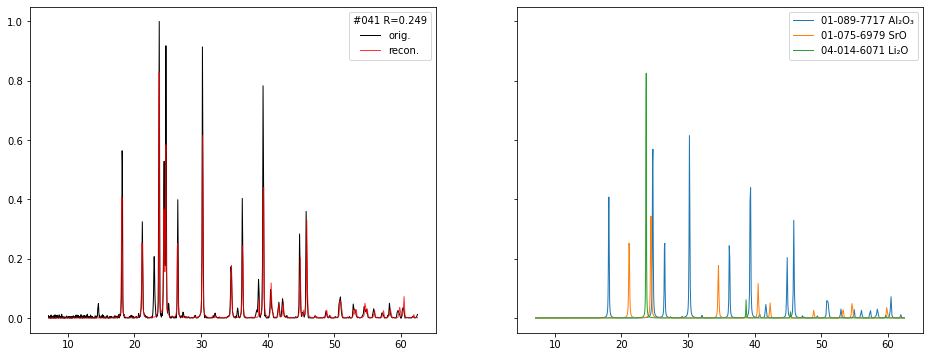

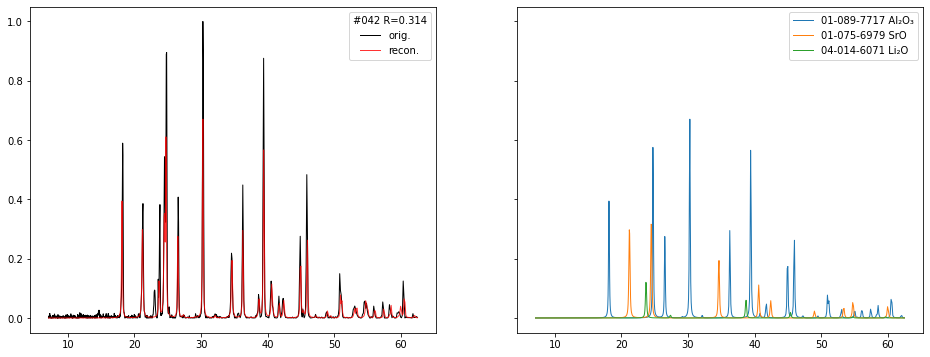

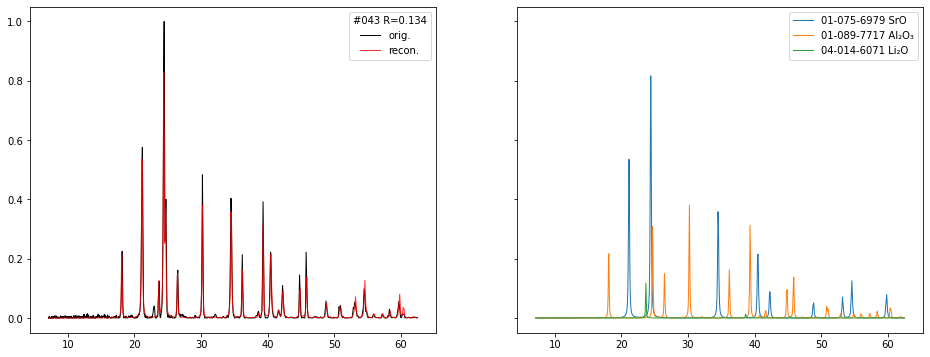

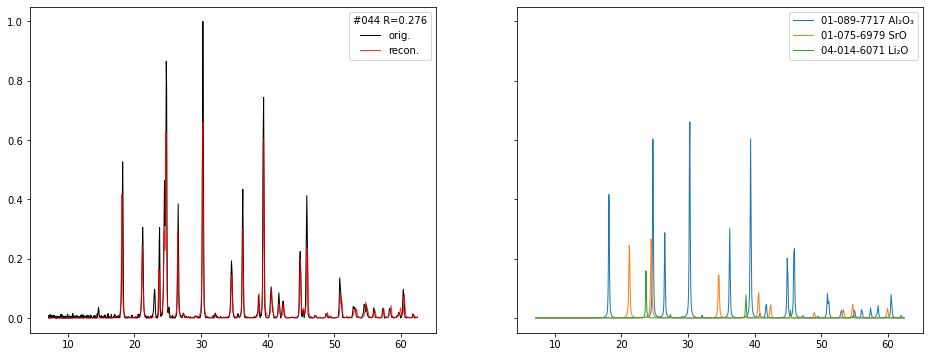

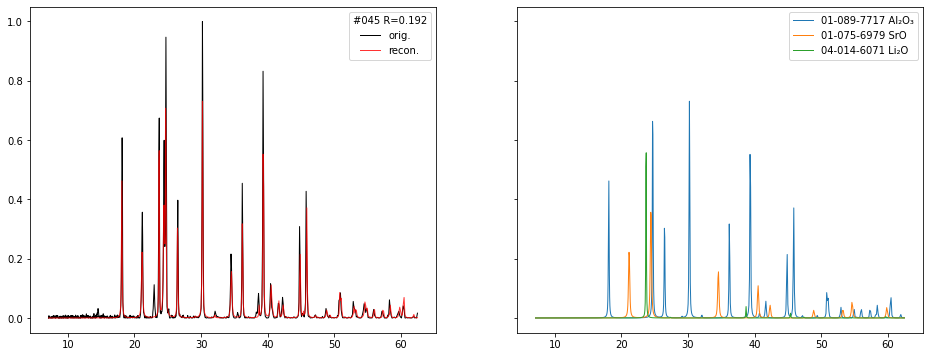

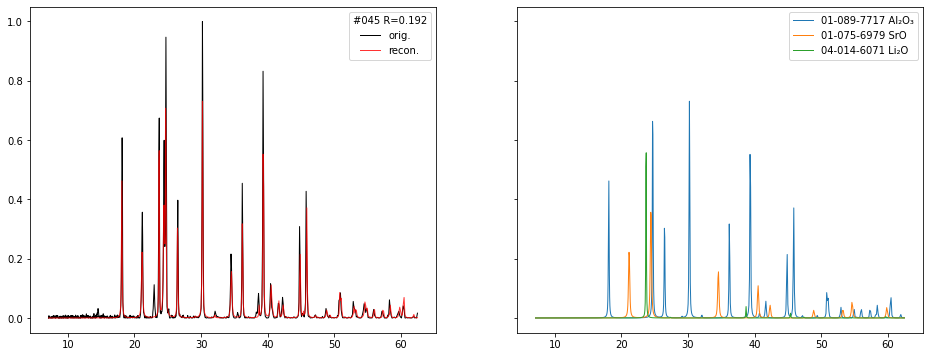

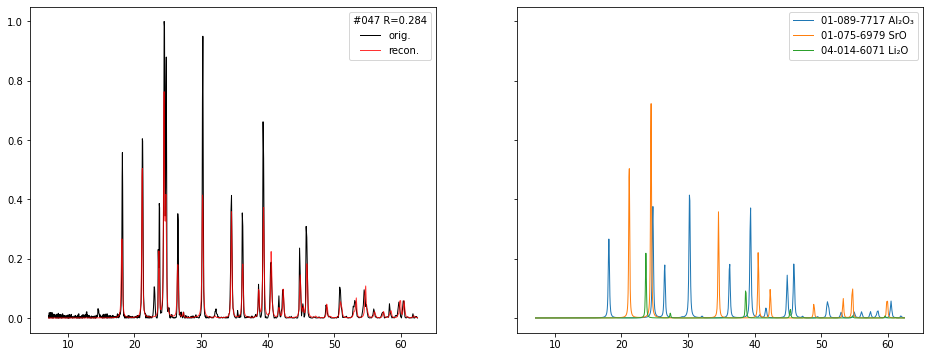

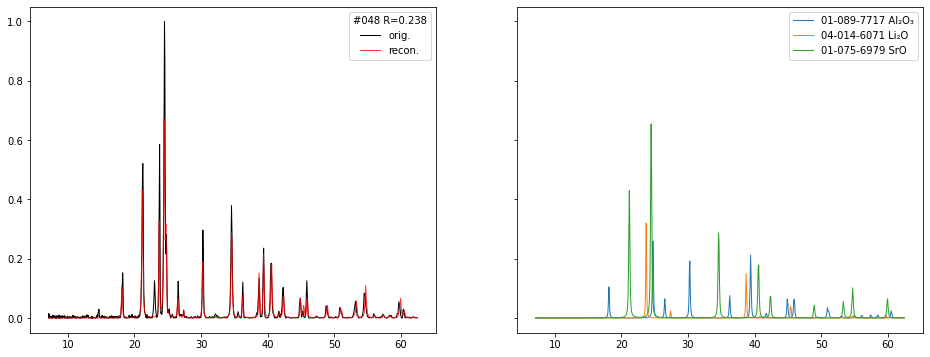

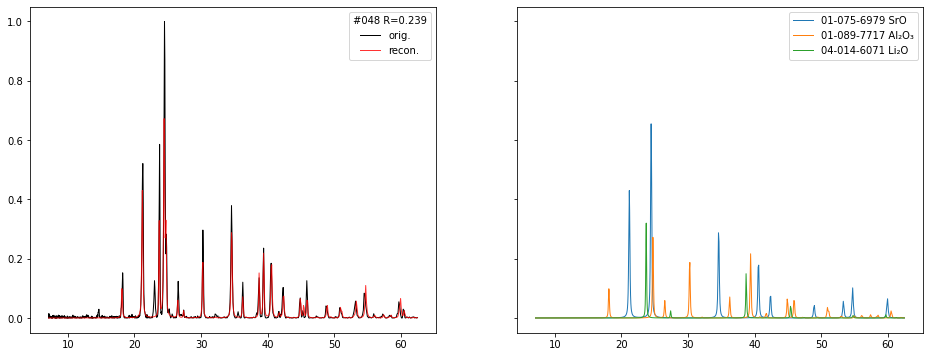

In [10]:
for sample in samples:    
    solution_file = f'solution/samples{sample.sample_id}.json'
#     sample.refine_one_by_one()
    sample.plot(perphase=True)
    with open(solution_file, 'w') as f:
        json.dump(sample, f, cls=MontyEncoder)
        sample.plot(perphase=True, saveplot=f'solution_figures/sample_{sample.sample_id}.pdf')

In [4]:
samples = []
for i in range(instance_data.sample_num):
    solution_file = f'solution/samples{i}.json'
    with open(solution_file) as f:
        sample = json.load(f, cls=MontyDecoder)
    if sample.sample_id !=i:
        print (i)    
    samples.append(sample)    

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

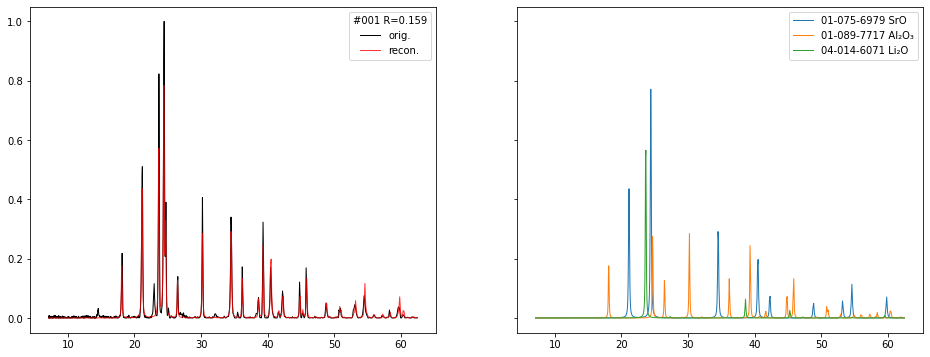

In [5]:
samples[1].plot(perphase=True)